# Introducir un potencial como csv

In [1]:
#Importar Librerías
 
from IPython.core.display import display, HTML, clear_output
display(HTML("<style>.container { width:100% !important; } div.cell.selected {border-left-width: 10px !important;}</style>"))
import os
import shutil
import glob
from sympy import *
import os
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import itertools as it
from PIL import Image
from IPython.display import clear_output
import random
if not 'notebook_dir' in globals():
    notebook_dir = os.getcwd()
print('Notebook directory: ' + notebook_dir)
os.chdir(notebook_dir)  # If you change the current working dir, this will take you back to the workbook dir.
top_dir = notebook_dir
from fastai.tabular.all import *
from skimage import data
from skimage.filters import threshold_multiotsu
import inspect
from sklearn.manifold import TSNE
from sklearn import decomposition
#from sklearn.preprocessing import scaled
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import more_itertools
from sklearn.manifold import TSNE
import cv2
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import imutils
from time import time
init_printing() # Numeros más bonitos
from matplotlib.colors import LogNorm, PowerNorm

Notebook directory: /home/gabriel/Desktop


In [2]:
# PROCESADO:

igualar_sexos = False #Mismo numero de hombres que de mujeres: True. Base completa: False
sust_idiomas = True #Cambiar los códigos numéricos del idioma por el idioma en sí
recuento_idi_acr = True # Añadir una columna de número de idiomas acreditados
# Contenido (carpetas donde se guardan las pcas, etc.):

carp = 'PCA_INE_estudiantes' #Carpeta de donde salen las PCAs
 
dd = top_dir + '/' + carp

if not os.path.isdir(dd):
    print('Creating directory:\n',dd)
    os.mkdir(dd)
 
dir = os.path.join(top_dir,carp)
direc = top_dir+'/'+'estudiantes.csv'
df = pd.read_csv(direc, sep = '\t', low_memory=False)
df['SEXO']=(df['SEXO']-1)*2-1

if igualar_sexos == True:
    # Igualar el número de hombres y mujeres en la encuesta
    np.random.seed(42)

    remove_n = len(np.where(df.SEXO == 1)[0]) - len(np.where(df.SEXO == -1)[0])
    drop_indices = np.random.choice(df.iloc[np.where(df.SEXO == 1)].index, remove_n, replace=False)
    df_temp = df.iloc[np.where(df.SEXO == 1)].drop(drop_indices)
    df = pd.concat([df_temp,df.drop(np.where(df.SEXO == 1)[0])],ignore_index = True)


a = df.SEXO.value_counts(normalize=False)
hom = a[-1]
muj = a[1]
print('Mujeres:',muj,', Porcentje: ', muj/(muj+hom)*100, '%')
print('Hombres:',hom,', Porcentje: ', hom/(muj+hom)*100, '%')


if sust_idiomas == True:
    dic_idi_m = {1:'Español',
                2:'Catalán',
                3:'Euskera',
                4:'Gallego',
                5:'Valenciano',
                6:'Inglés',
                7:'Francés',
                8:'Alemán',
                9:'Italiano',
                10:'Portugués',
                11:'Rumano',
                12:'Árabe',
                13:'Chino',
                14:'Ruso',
                15:'Otros idiomas',
                99:'NS/NC'}
    
    dic_idi = {'01':'Español',
            '02':'Catalán',
            '03':'Euskera',
            '04':'Gallego',
            '05':'Valenciano',
            '06':'Inglés',
            '07':'Francés',
            '08':'Alemán',
            '09':'Italiano',
            '10':'Portugués',
            '11':'Rumano',
            '12':'Árabe',
            '13':'Chino',
            '14':'Ruso',
            '15':'Otros idiomas',
            '99':'NS/NC',
            '  ':'No Aplicable'}
    
    df['IDI_MT1'] = df.IDI_MT1.replace(dic_idi_m)
    df['IDI_MT2'] = df.IDI_MT2.replace(dic_idi)
    df['IDIOMA1'] = df.IDIOMA1.replace(dic_idi)
    df['IDIOMA2'] = df.IDIOMA2.replace(dic_idi)
    df['IDIOMA3'] = df.IDIOMA3.replace(dic_idi)
    df['IDIOMA4'] = df.IDIOMA4.replace(dic_idi)
    

if recuento_idi_acr == True:
    #NUM_TIT_IDI : Número de títulos de idiomas que puede acreditar

    ids = []

    for a in range(len(df.ACREIDI1)):
        b = 0
        if df.ACREIDI1.iloc[a] == '1':
            b += 1
        if df.ACREIDI2.iloc[a] == '1':
            b += 1
        if df.ACREIDI3.iloc[a] == '1':
            b += 1
        if df.ACREIDI4.iloc[a] == '1':
            b += 1

        ids.append(b)

    df['NUM_TIT_IDI'] = ids

Mujeres: 18056 , Porcentje:  57.047170705506936 %
Hombres: 13595 , Porcentje:  42.952829294493064 %


In [3]:
df['IDIOMA4'].value_counts()

No Aplicable     30903
Italiano           155
Francés            114
Alemán             113
Otros idiomas      101
Portugués           74
Catalán             50
Inglés              33
Chino               28
Ruso                22
Árabe               16
Valenciano          11
Gallego              9
Español              7
Euskera              7
NS/NC                6
Rumano               2
Name: IDIOMA4, dtype: int64

In [22]:
# Contenido (carpetas donde se guardan las pcas, etc.):

carp = 'PCA_INE_estudiantes' #Carpeta de donde salen las PCAs
 
dd = top_dir + '/' + carp

if not os.path.isdir(dd):
    print('Creating directory:\n',dd)
    os.mkdir(dd)
 
dir = os.path.join(top_dir,carp)

In [23]:
direc = top_dir+'/'+'estudiantes.csv'

In [24]:
df = pd.read_csv(direc, sep = '\t', low_memory=False)
df['SEXO']=(df['SEXO']-1)*2-1
df.SEXO

0       -1
1       -1
2       -1
3       -1
4       -1
        ..
31646    1
31647    1
31648   -1
31649   -1
31650   -1
Name: SEXO, Length: 31651, dtype: int64

In [25]:
df.shape

In [26]:
a = df.SEXO.value_counts(normalize=False)
hom = a[-1]
muj = a[1]
print('Mujeres:',muj,', Porcentje: ', muj/(muj+hom)*100, '%')
print('Hombres:',hom,', Porcentje: ', hom/(muj+hom)*100, '%')

Mujeres: 18056 , Porcentje:  57.047170705506936 %
Hombres: 13595 , Porcentje:  42.952829294493064 %


In [9]:
# Igualar el número de hombres y mujeres en la encuesta
np.random.seed(42)

remove_n = len(np.where(df.SEXO == 1)[0]) - len(np.where(df.SEXO == -1)[0])
drop_indices = np.random.choice(df.iloc[np.where(df.SEXO == 1)].index, remove_n, replace=False)
df_temp = df.iloc[np.where(df.SEXO == 1)].drop(drop_indices)
df = pd.concat([df_temp,df.drop(np.where(df.SEXO == 1)[0])],ignore_index = True)

In [10]:
a = df.SEXO.value_counts(normalize=False)
hom = a[-1]
muj = a[1]
print('Mujeres:',muj,', Porcentje: ', muj/(muj+hom)*100, '%')
print('Hombres:',hom,', Porcentje: ', hom/(muj+hom)*100, '%')

Mujeres: 13595 , Porcentje:  50.0 %
Hombres: 13595 , Porcentje:  50.0 %


In [28]:
df.shape

In [31]:
df.columns

Index(['IDENT', 'SEXO', 'EDAD', 'NACIO', 'NACIO1', 'NACIO2', 'PAIS_NACI',
       'TITU', 'RAMA', 'AMBITO',
       ...
       'ANHCUR4', 'DENCUR5', 'DURCUR5', 'RESCUR5', 'ANHCUR5', 'DENCUR6',
       'DURCUR6', 'RESCUR6', 'ANHCUR6', 'FACTOR'],
      dtype='object', length=299)

In [34]:
list(df.columns)

['IDENT',
 'SEXO',
 'EDAD',
 'NACIO',
 'NACIO1',
 'NACIO2',
 'PAIS_NACI',
 'TITU',
 'RAMA',
 'AMBITO',
 'T_UNIV',
 'DISCA',
 'PROXY',
 'LUG_RES_PAIS',
 'PAIS_NAC_PADRE',
 'ESTUDIOS_PADRE',
 'PAIS_NAC_MADRE',
 'ESTUDIOS_MADRE',
 'EST_B1',
 'EST_B2_1',
 'EST_B2_2',
 'EST_B2_3',
 'EST_B2_4',
 'EST_B2_5',
 'EST_M1',
 'EST_M2',
 'EST_M3',
 'EST_M4',
 'EST_MES',
 'EST_B8',
 'SAT1',
 'SAT2',
 'EST_B11_1',
 'EST_B11_2',
 'EST_B11_3',
 'EST_B11_4',
 'EST_B11_5',
 'EST_B11_6',
 'EST_B11_7',
 'EST_B12',
 'EST_B13_AMB1',
 'EST_B14_1',
 'EST_B15_1',
 'EST_B13_AMB2',
 'EST_B14_2',
 'EST_B15_2',
 'EST_B13_AMB3',
 'EST_B14_3',
 'EST_B15_3',
 'EST_B16',
 'EST_B17_M1',
 'EST_B18_1',
 'EST_B19_1',
 'EST_B17_M2',
 'EST_B18_2',
 'EST_B19_2',
 'EST_B17_M3',
 'EST_B18_3',
 'EST_B19_3',
 'EST_B21',
 'EST_B22',
 'EST_B23',
 'EST_B24',
 'EST_B25_FA1',
 'EST_B26_1',
 'EST_B27_1',
 'EST_B25_FA2',
 'EST_B26_2',
 'EST_B27_2',
 'EST_B25_FA3',
 'EST_B26_3',
 'EST_B27_3',
 'EST_B28',
 'EST_B29_FA1',
 'EST_B30_1',
 'ES

In [35]:
splits = RandomSplitter(valid_pct=0.2)(range_of(df))

to = TabularPandas(df,
                procs=[Categorify,FillMissing],
                cat_names = list(df.drop('SEXO', axis = 1).columns),
                #cont_names = ['SALBASE', 'EXTRAORM',
                #               'PHEXTRA', 'COMSAL', 'COMSALTT', 'IRPFMES', 'COTIZA', 'BASE','RETRIIN',
                #               'GEXTRA', 'VESPNOIN', 'VESPIN', 'ANOS2', 'FACTOTAL'],
                y_names = 'SEXO',
                splits=splits)

In [29]:
splits = RandomSplitter(valid_pct=0.2)(range_of(df))

to = TabularPandas(df,
                procs=[Categorify,FillMissing],
                cat_names = ['IDENCCC', 'ORDENTRA', 'NUTS1', 'CNACE', 'ESTRATO2', 'CONTROL',
                               'MERCADO', 'REGULACION', 'TIPOPAIS', 'CNO1', 'RESPONSA', 'ESTU',
                               'ANOANTI', 'MESANTI', 'TIPOJOR', 'TIPOCON', 'FIJODISM', 'FIJODISD',
                               'VAL', 'VAN', 'PUENTES', 'JAP', 'JSP1', 'JSP2', 'HEXTRA', 'DRELABM',
                               'SIESPM1', 'DSIESPM1', 'SIESPM2', 'DSIESPM2', 
                               'DRELABAM', 'DRELABAD', 'SIESPA1', 'DSIESPA1', 'SIESPA2', 'DSIESPA2',
                               'SIESPA3', 'DSIESPA3', 'SIESPA4', 'DSIESPA4', 'RETRINOIN'],
                cont_names = ['SALBASE', 'EXTRAORM',
                               'PHEXTRA', 'COMSAL', 'COMSALTT', 'IRPFMES', 'COTIZA', 'BASE','RETRIIN',
                               'GEXTRA', 'VESPNOIN', 'VESPIN', 'ANOS2', 'FACTOTAL'],
                y_names = 'SEXO',
                splits=splits)



# Load the data into a DataLoader
dls = to.dataloaders(bs=5000)

# Define a Tabular Learner
learn = tabular_learner(dls, layers=[100,100,100,100,100,100]
                      #,config=config
                      ,metrics=[accuracy],
                      #y_range = [min(df.bin),max(df.bin)],
                      #,cbs=ShowGraphCallback()
                      #,train_bn=False)
                      )

#---------------- Entrenar red -----------------------------#


# Train the net 
with learn.no_logging():
      learn.fit_one_cycle(n_epoch=30
                          ,lr_max=0.01
                          ,cbs=[SaveModelCallback(monitor='accuracy'),ShowGraphCallback()]
                          )
        

#---------------- Sacar PCA -----------------------------#        
        
test_df = df.copy()
dl = learn.dls.test_dl(test_df,bs=test_df.shape[0]) 

# Tenemos que hacer un Hook, una especie de gancho que enganchamos en la última capa interna,
# para guardar, de cada modelo, los valores de los parámetro de dicha capa. 
with Hooks(learn.model.layers, lambda m,i,o: o) as h:
    preds = learn.get_preds(dl=dl,with_input=True,with_decoded=True,with_loss=True)

targets=preds[2].numpy().flatten()

# Cogemos la información de la penúltima capa
# OJO: Si añadimos y_range, se añade automaticamente una sigmoid
# al final, por lo que tendríamos que coger la capa -3 en vez de la -2
act = h.stored[-2] 
multi_dim=Tensor.cpu(act).numpy()
standardized=StandardScaler().fit_transform(multi_dim)

viz = PCA(2).fit_transform(standardized)

#---------------- Guardar PCA -----------------------------#

#--- Image of the PCA. Just for testing ---#
#plt.figure()
#plt.scatter(viz[:, 0], viz[:, 1],c=targets[:multi_dim.shape[0]],alpha=.1, marker = 'o')


viz = pd.DataFrame(viz) #Transformamos la PCA en un dataframe
viz.columns = ['x','y'] #Nombres de las columnas


# Insertamos una columna con los colores de los puntos. El valor del potencial
# objetivo (targets) es el color, y hay un color por cada punto 
viz.insert(2,'class',targets[:multi_dim.shape[0]]) 

# ---- Personalizar mapa de color 

n_classes=1000

colors = 'rainbow'

if colors == 'rainbow':
    my_cmap = plt.cm.get_cmap('rainbow', n_classes)
    classes_in_rgb = my_cmap(range(n_classes))
if colors == 'purple':
    my_cmap = plt.cm.get_cmap('rainbow', n_classes)
    classes_in_rgb = np.vstack((np.array([0,0,0,0]),my_cmap([0 for i in range(n_classes)])))

# ---- Hacer que la intensidad del pixel represente la cantidad de puntos 
#      acumuldos en un pixel

n_pixels = 224

binning_3d=np.histogramdd([viz['x'],viz['y'],viz['class']],range=(None,None,(0,1)), bins=(n_pixels,n_pixels,n_classes))

#if we want the pixel intensity to reprensent the number of points at that location
array = np.dot(binning_3d[0],classes_in_rgb)
array = array/np.amax(array)

# ---- Guardar la PCA

#Directorio donde guardaremos las imagenes
dir_sym = os.path.join(dir,'INE')
if not os.path.isdir(dir_sym):
  print('Creating directory:\n',dir_sym)
  os.mkdir(dir_sym)

img_file = 'INE_pred_sexo'+str(round(time()))+'_PCA.png' 

output_dir = os.path.join(dir_sym,img_file) # Directorio donde guardamos la imagen
plt.imsave(output_dir,array) # Guardar
print('\nPCA saved to:\n{}\n'.format(dir_sym+'/'+img_file))

KeyError: "None of [Index(['SALBASE', 'EXTRAORM', 'PHEXTRA', 'COMSAL', 'COMSALTT', 'IRPFMES',\n       'COTIZA', 'BASE', 'RETRIIN', 'GEXTRA', 'VESPNOIN', 'VESPIN', 'ANOS2',\n       'FACTOTAL'],\n      dtype='object')] are in the [columns]"

SuggestedLRs(lr_min=0.010000000149011612, lr_steep=0.04786301031708717)

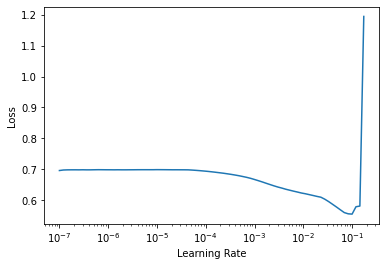

In [18]:
learn.lr_find()

Better model found at epoch 0 with accuracy value: 0.6825931668281555.


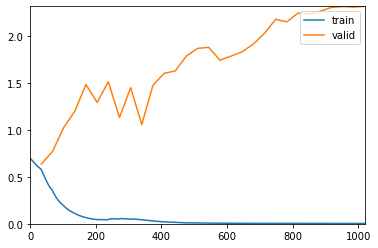

Better model found at epoch 2 with accuracy value: 0.7062637209892273.
Better model found at epoch 3 with accuracy value: 0.7352866530418396.
Better model found at epoch 9 with accuracy value: 0.741723358631134.
Better model found at epoch 11 with accuracy value: 0.7442611455917358.
Better model found at epoch 12 with accuracy value: 0.7463144659996033.
Better model found at epoch 13 with accuracy value: 0.7476294636726379.
Better model found at epoch 14 with accuracy value: 0.7482985258102417.
Better model found at epoch 18 with accuracy value: 0.748460054397583.


In [25]:
# Train the net 
with learn.no_logging():
      learn.fit_one_cycle(n_epoch=30
                          ,lr_max=0.01
                          ,cbs=[SaveModelCallback(monitor='accuracy'),ShowGraphCallback()]
                          )



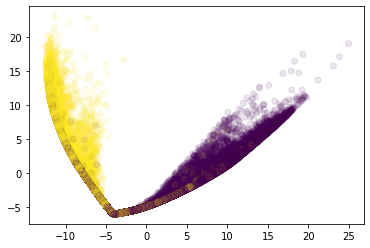

In [29]:
test_df = df.copy()
dl = learn.dls.test_dl(test_df,bs=test_df.shape[0]) 

# Tenemos que hacer un Hook, una especie de gancho que enganchamos en la última capa interna,
# para guardar, de cada modelo, los valores de los parámetro de dicha capa. 
with Hooks(learn.model.layers, lambda m,i,o: o) as h:
    preds = learn.get_preds(dl=dl,with_input=True,with_decoded=True,with_loss=True)

targets=preds[2].numpy().flatten()

# Cogemos la información de la penúltima capa
# OJO: Si añadimos y_range, se añade automaticamente una sigmoid
# al final, por lo que tendríamos que coger la capa -3 en vez de la -2
act = h.stored[-2] 
multi_dim=Tensor.cpu(act).numpy()
standardized=StandardScaler().fit_transform(multi_dim)

viz = PCA(2).fit_transform(standardized)



#--- Image of the PCA. Just for testing ---#
plt.figure()
plt.scatter(viz[:, 0], viz[:, 1],c=targets[:multi_dim.shape[0]],alpha=.1, marker = 'o')

In [32]:
viz = pd.DataFrame(viz) #Transformamos la PCA en un dataframe
viz.columns = ['x','y'] #Nombres de las columnas


# Insertamos una columna con los colores de los puntos. El valor del potencial
# objetivo (targets) es el color, y hay un color por cada punto 
viz.insert(2,'class',targets[:multi_dim.shape[0]]) 

# ---- Personalizar mapa de color 

n_classes=1000

colors = 'rainbow'

if colors == 'rainbow':
    my_cmap = plt.cm.get_cmap('rainbow', n_classes)
    classes_in_rgb = my_cmap(range(n_classes))
if colors == 'purple':
    my_cmap = plt.cm.get_cmap('rainbow', n_classes)
    classes_in_rgb = np.vstack((np.array([0,0,0,0]),my_cmap([0 for i in range(n_classes)])))

# ---- Hacer que la intensidad del pixel represente la cantidad de puntos 
#      acumuldos en un pixel

n_pixels = 224

binning_3d=np.histogramdd([viz['x'],viz['y'],viz['class']],range=(None,None,(0,1)), bins=(n_pixels,n_pixels,n_classes))

#if we want the pixel intensity to reprensent the number of points at that location
array = np.dot(binning_3d[0],classes_in_rgb)
array = array/np.amax(array)

# ---- Guardar la PCA

#Directorio donde guardaremos las imagenes
dir_sym = os.path.join(dir,'INE')
if not os.path.isdir(dir_sym):
  print('Creating directory:\n',dir_sym)
  os.mkdir(dir_sym)

img_file = 'INE_pred_sexo'+str(round(time()))+'_PCA.png' 

output_dir = os.path.join(dir_sym,img_file) # Directorio donde guardamos la imagen
plt.imsave(output_dir,array) # Guardar
print('\nPCA saved to:\n{}\n'.format(dir_sym+'/'+img_file))


PCA saved to:
/home/gabriel/Desktop/pruebas/INE/INE_pred_sexo1631024683_PCA.png



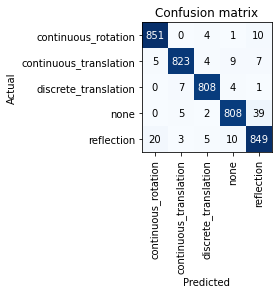

In [34]:
from fastai.vision.all import *
from time import time

dir2 = os.path.join(top_dir,'PCAs')

pcas = DataBlock(blocks=(ImageBlock, CategoryBlock),
   get_items=get_image_files,
   get_y=parent_label,
   splitter=RandomSplitter(valid_pct=0.2, seed=42),
   item_tfms=Resize(224)
   ,batch_tfms=aug_transforms(mult=0.2,do_flip=False)
   )
 
path = Path(dir2)
 
dls = pcas.dataloaders(path,bs=64) #default 150

model_name = 'model_90_accu_resnet18_one_cycle_10+5_no_mixup'
model_dir = top_dir + '/models/' + model_name

learn2 = cnn_learner(dls, resnet18, metrics=accuracy)
learn2.load(model_dir)

interp2 = ClassificationInterpretation.from_learner(learn2)
interp2.plot_confusion_matrix()

In [48]:
test_im_dir = '/home/gabriel/Desktop/pruebas/INE/INE_pred_sexo1631024683_PCA.png'

im = PILImage.create(test_im_dir)

# Orden: ['continuous_rotation', 'continuous_translation','discrete_translation','none','reflection']
# Sacar Orden: learn.dls.vocab

cate, num_cat, probs = learn2.predict(im)

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

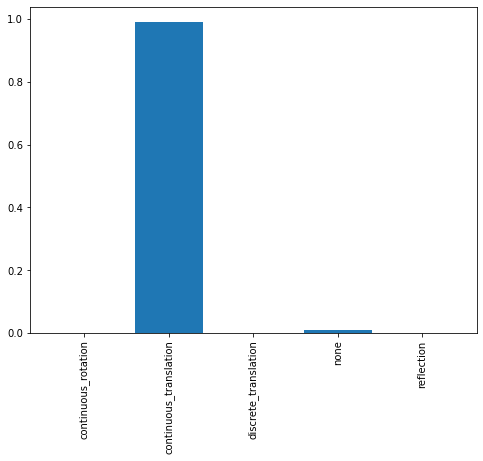

In [59]:
plt.figure(figsize=(8, 6))
plt.bar(['continuous_rotation', 'continuous_translation','discrete_translation','none','reflection'],probs)
plt.xticks(rotation='vertical')

## Hacer una PCA y guardarla

In [5]:
class SaveModelCallback(TrackerCallback):
    "A `TrackerCallback` that saves the model's best during training and loads it at the end."
    _only_train_loop = True
    def __init__(self, monitor='valid_loss', comp=None, min_delta=0., fname='model', every_epoch=False, at_end=False,
                 with_opt=False, reset_on_fit=True):
        super().__init__(monitor=monitor, comp=comp, min_delta=min_delta, reset_on_fit=reset_on_fit)
        assert not (every_epoch and at_end), "every_epoch and at_end cannot both be set to True"
        # keep track of file path for loggers
        self.last_saved_path = None
        store_attr('fname,every_epoch,at_end,with_opt')

    def _save(self, name): self.last_saved_path = self.learn.save(name, with_opt=self.with_opt)

    def after_epoch(self):
        "Compare the value monitored to its best score and save if best."
        if self.every_epoch: self._save(f'{self.fname}_{self.epoch}')
        else: #every improvement
            super().after_epoch()
            if self.new_best:
                #print(f'Better model found at epoch {self.epoch} with {self.monitor} value: {self.best}.')
                self._save(f'{self.fname}')

    def after_fit(self, **kwargs):
        "Load the best model."
        if self.at_end: self._save(f'{self.fname}')
        elif not self.every_epoch: self.learn.load(f'{self.fname}', with_opt=self.with_opt)

In [44]:
len(impo)

In [71]:
# Mas Importantes en orden
#impo = ['TIC','TITU','PR_OCU','TR_CNAE','AMBITO','TR_SUELDO','TRABOC','HL_E2','PR_SUELDO','TR_D22_6','HO_TIPO','HATR_NUM','ESTUDIOS_PADRE','TR_ANIO','TIPOACREIDI1','HO_NPER','ESTUDIOS_MADRE','BCOTC19','TR_TAM','TR_D22_2','EDAD','HATR_E11','TR_D22_1','TR_D22_5','PR_NIVEL','BCOTC16','HL_E1','TR_D20','BCOTC17','BCOTC18','TR_D22_4','EST_B39_5','TR_D22_3','PR_SIT_PR','BCOTC15','RAMA']
# FACTOR puede revelar el sexo. Es un ajuste para extrapolar la encuesta a toda la población
# IDENT el número de identificación no tendría nada que ver con los resultdos, pero es de lo que mas afecta. Lo quitamos.

impo = ['SEXO','EDAD','TITU','RAMA','AMBITO','EST_M1','EST_M2','IDIOMAS','NIV_ID1','HO_F1','TIC']

start_time = time()
images_done = 0


#Numero de PCAs que tiene que hacer
num_pot = 1



for i in range(num_pot):
    quita = ['mix'] 
    quitadas = '-'
    for q in quita:
        quitadas = quitadas + q + '-'


    splits = RandomSplitter(valid_pct=0.2)(range_of(df))

    to = TabularPandas(df,
                    procs=[Categorify,FillMissing],
                    cat_names = impo,
                    #cont_names = ['SALBASE'],
                    y_names = 'TRBPRN1',
                    y_block = CategoryBlock,
                    splits=splits)



    # Load the data into a DataLoader
    dls = to.dataloaders(bs=7000)

    # Define a Tabular Learner
    learn = tabular_learner(dls, layers=[200,200,200,200,200,200]
                          #,config=config
                          ,metrics=[accuracy],
                          #y_range = [min(df.bin),max(df.bin)],
                          #,cbs=ShowGraphCallback()
                          #,train_bn=False)
                          )

    #---------------- Entrenar red -----------------------------#


    # Train the net 
    with learn.no_logging():
          learn.fit_one_cycle(n_epoch=50
                              ,lr_max=0.001
                              ,cbs=[SaveModelCallback(monitor='accuracy')
                                    #,ShowGraphCallback()
                                   ]
                              )


    #---------------- Sacar PCA -----------------------------#        

    test_df = df.iloc[:,:].copy()
    dl = learn.dls.test_dl(test_df,bs=5000) 

    # Tenemos que hacer un Hook, una especie de gancho que enganchamos en la última capa interna,
    # para guardar, de cada modelo, los valores de los parámetro de dicha capa. 
    with Hooks(learn.model.layers, lambda m,i,o: o) as h:
        preds = learn.get_preds(dl=dl,with_input=True,with_decoded=True,with_loss=True)

    targets=preds[2].numpy().flatten()

    # Cogemos la información de la penúltima capa
    # OJO: Si añadimos y_range, se añade automaticamente una sigmoid
    # al final, por lo que tendríamos que coger la capa -3 en vez de la -2
    act = h.stored[-2] 
    multi_dim=Tensor.cpu(act).numpy()
    standardized=StandardScaler().fit_transform(multi_dim)

    viz = PCA(2).fit_transform(standardized)

    #---------------- Guardar PCA -----------------------------#

    #--- Image of the PCA. Just for testing ---#
    #plt.figure()
    #plt.scatter(viz[:, 0], viz[:, 1],c=targets[:multi_dim.shape[0]],alpha=.1, marker = 'o')


    viz = pd.DataFrame(viz) #Transformamos la PCA en un dataframe
    viz.columns = ['x','y'] #Nombres de las columnas


    # Insertamos una columna con los colores de los puntos. El valor del potencial
    # objetivo (targets) es el color, y hay un color por cada punto 
    viz.insert(2,'class',targets[:multi_dim.shape[0]]) 

    # ---- Personalizar mapa de color 

    n_classes=500

    colors = 'rainbow'

    if colors == 'rainbow':
        my_cmap = plt.cm.get_cmap('rainbow', n_classes)
        classes_in_rgb = my_cmap(range(n_classes))
    if colors == 'purple':
        my_cmap = plt.cm.get_cmap('rainbow', n_classes)
        classes_in_rgb = np.vstack((np.array([0,0,0,0]),my_cmap([0 for i in range(n_classes)])))

    # ---- Hacer que la intensidad del pixel represente la cantidad de puntos 
    #      acumuldos en un pixel

    n_pixels = 224

    binning_3d=np.histogramdd([viz['x'],viz['y'],viz['class']],range=(None,None,(0,1)), bins=(n_pixels,n_pixels,n_classes))

    #if we want the pixel intensity to reprensent the number of points at that location
    array = np.dot(binning_3d[0],classes_in_rgb)
    array = array/np.amax(array)

    # ---- Guardar la PCA

    #Directorio donde guardaremos las imagenes
    dir_sym = os.path.join(dir,'INE',quitadas)
    if not os.path.isdir(dir_sym):
      print('Creating directory:\n',dir_sym)
      os.makedirs(dir_sym)

    img_file = 'INE_pred_sexo'+str(round(time()))+quitadas+'_PCA.png' 

    output_dir = os.path.join(dir_sym,img_file) # Directorio donde guardamos la imagen
    plt.imsave(output_dir,array) # Guardar
    print('\nPCA saved to:\n{}\n'.format(dir_sym+'/'+img_file))
    
    minutes_until_now = (time() - start_time)/60
    images_done += 1
    minutes_per_image = minutes_until_now/(images_done)
    hours_left = minutes_per_image * (num_pot-images_done)/60
    print("\n{} PCA's made out of {}.\n".format(images_done,num_pot))
    print("{:.1f} minutes elapsed for {} images.".format(minutes_until_now,images_done))
    print("{:.1f} minutes average per image.".format(minutes_until_now/images_done))
    print("{:.1f} minutes estimated left for {} images.\n\n\n".format(hours_left*60,num_pot-images_done))
    print("{:.1f} hours estimated left for {} images.\n\n\n".format(hours_left,num_pot-images_done))
    
    import torch, gc
    gc.collect()
    torch.cuda.empty_cache()

Better model found at epoch 0 with accuracy value: 0.8589555025100708.


Creating directory:
 /home/gabriel/Desktop/PCA_INE_estudiantes/INE/-mix-

PCA saved to:
/home/gabriel/Desktop/PCA_INE_estudiantes/INE/-mix-/INE_pred_sexo1632386392-mix-_PCA.png


1 PCA's made out of 1.

0.2 minutes elapsed for 1 images.
0.2 minutes average per image.
0.0 minutes estimated left for 0 images.



0.0 hours estimated left for 0 images.





SuggestedLRs(lr_min=0.00043651582673192023, lr_steep=0.00010964782268274575)

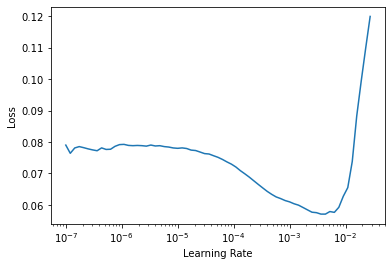

In [47]:
learn.lr_find()

In [34]:
learn.validate()

(#2) [0.5633693337440491,0.731341540813446]

In [59]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()

## Feature importance

/home/gabriel/anaconda3/envs/pytorch/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


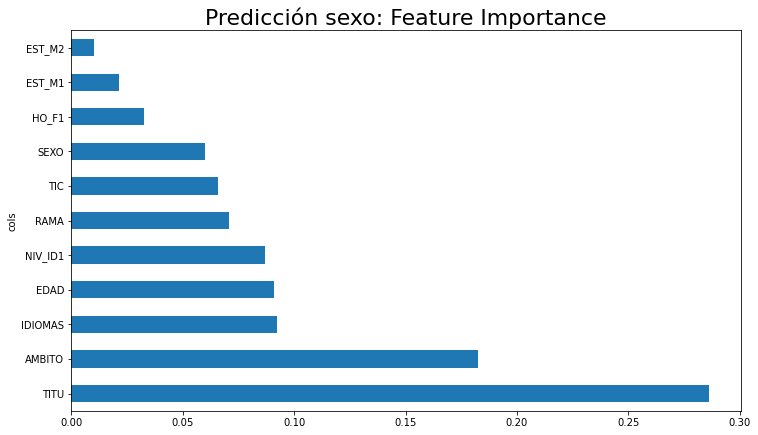

In [72]:
from sklearn.ensemble import RandomForestRegressor

def rf(xs, y, n_estimators=100, max_samples=300,
       max_features=0.8, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)


# Antes de nada, definimos la funcion accuracy para nuestro proyecto
def accu(pred,y):
  predo = pred 
  for i in range(len(pred)):
    if pred[i] < 0.5:
      predo[i] = 0
    else:
      predo[i] = 1
  
  accur = 1 - sum((y-predo)**2)/len(pred)
  
  return accur

def m_accu(m, xs, y): return accu(m.predict(xs), y)


# ----- Separar en data + targets -------#
xs = pd.DataFrame(to.xs)
y = np.array(pd.DataFrame(to.ys))

# ----Modelo Random Forests ----#
m = rf(xs, y);
#print('Accuracy trainig = ', accu(m.predict(xs),y))

# Feature Importance usando Random Forests
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

fi = rf_feat_importance(m, xs)

#fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)
fi[fi.imp>0.007].plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)
plt.title('Predicción sexo: Feature Importance',fontsize = 22)
plt.show()

In [76]:
list(fi[fi.imp>0.007].cols)

['TITU',
 'AMBITO',
 'IDIOMAS',
 'EDAD',
 'NIV_ID1',
 'RAMA',
 'TIC',
 'SEXO',
 'HO_F1',
 'EST_M1',
 'EST_M2']

In [53]:
df = pd.read_csv(direc, sep = '\t', low_memory=False)
df['SEXO']=(df['SEXO']-1)*2-1
# Igualar el número de hombres y mujeres en la encuesta
np.random.seed(42)

remove_n = len(np.where(df.SEXO == 1)[0]) - len(np.where(df.SEXO == -1)[0])
drop_indices = np.random.choice(df.iloc[np.where(df.SEXO == 1)].index, remove_n, replace=False)
df_temp = df.iloc[np.where(df.SEXO == 1)].drop(drop_indices)
df = pd.concat([df_temp,df.drop(np.where(df.SEXO == 1)[0])],ignore_index = True)


In [63]:
to.y.value_counts()

0    23344
1     2077
2     1769
Name: TRBPRN1, dtype: int64

In [73]:
columnas = list(fi.cols[:10])
df_num = pd.DataFrame(xs[columnas])
df_num['TRBPRN1'] = to.y
datos_corr = np.abs(df_num.reset_index().drop('index', axis = 1).corr())
datos_corr

,TITU,AMBITO,IDIOMAS,EDAD,NIV_ID1,RAMA,TIC,SEXO,HO_F1,EST_M1,TRBPRN1
TITU,1.000000,0.306838,0.000276,0.046236,0.020287,0.581590,0.077593,0.124036,0.010789,0.001133,0.111738
AMBITO,0.306838,1.000000,0.065219,0.007206,0.040235,0.505506,0.079467,0.060689,0.027463,0.058303,0.073215
IDIOMAS,0.000276,0.065219,1.000000,0.063460,0.116554,0.081245,0.054905,0.009052,0.020277,0.218734,0.004705
EDAD,0.046236,0.007206,0.063460,1.000000,0.065662,0.051194,0.008776,0.106877,0.385141,0.147208,0.026324
NIV_ID1,0.020287,0.040235,0.116554,0.065662,1.000000,0.041452,0.048216,0.033397,0.019723,0.121706,0.002484
RAMA,0.581590,0.505506,0.081245,0.051194,0.041452,1.000000,0.055460,0.031796,0.028024,0.064546,0.136014
TIC,0.077593,0.079467,0.054905,0.008776,0.048216,0.055460,1.000000,0.231036,0.026982,0.036547,0.090478
SEXO,0.124036,0.060689,0.009052,0.106877,0.033397,0.031796,0.231036,1.000000,0.004267,0.011797,0.031406
HO_F1,0.010789,0.027463,0.020277,0.385141,0.019723,0.028024,0.026982,0.004267,1.000000,0.093620,0.023044
EST_M1,0.001133,0.058303,0.218734,0.147208,0.121706,0.064546,0.036547,0.011797,0.093620,1.000000,0.003534


In [75]:
columnas

['TITU',
 'AMBITO',
 'IDIOMAS',
 'EDAD',
 'NIV_ID1',
 'RAMA',
 'TIC',
 'SEXO',
 'HO_F1',
 'EST_M1']

<AxesSubplot:>

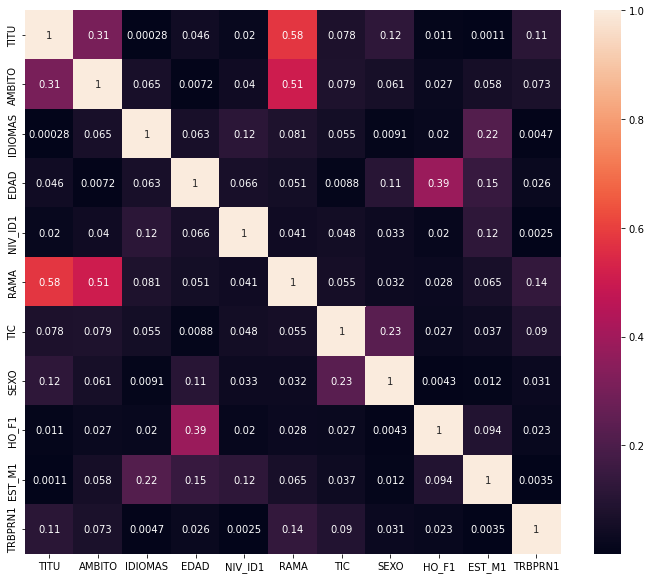

In [74]:
# Matriz de correlacion de features
import seaborn as sns
plt.figure(figsize = [12,10])
sns.heatmap(datos_corr, annot=True)

In [9]:
import pandas as pd

pd_stud = (pd.read_csv('inser_lab_grad.csv', sep = '\t', low_memory = False))
pd_stud.TRBPRN1.value_counts()

1    27124
2     2438
3     2089
Name: TRBPRN1, dtype: int64

In [90]:
df.TRBPRN1.iloc[np.where(df.TITU == tit)].value_counts()

1    51
3     3
Name: TRBPRN1, dtype: int64

In [95]:
tit_most_pop = df.TITU.value_counts().index
frac_ocu = []

for tit in tit_most_pop:
    frac_ocu.append(df.TRBPRN1.iloc[np.where(df.TITU == tit)].value_counts()[1]/len(df.TRBPRN1.iloc[np.where(df.TITU == tit)]))

df_tit_ocu = pd.DataFrame({'TITU':tit_most_pop, 'FRAC_OCU': frac_ocu}).sort_values(by = 'FRAC_OCU', ignore_index = True)

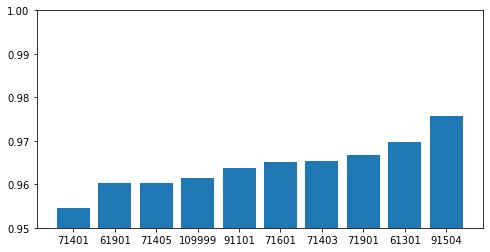

In [106]:
plt.figure(figsize = [8,4])
plt.bar(range(10),df_tit_ocu.FRAC_OCU.iloc[-10:])
plt.ylim([0.95,1])
xtc = plt.xticks(range(10),df_tit_ocu.TITU.iloc[-10:])

In [107]:
df_tit_ocu.iloc[np.where(df_tit_ocu.TITU == 72102 )]

,TITU,FRAC_OCU
71,72102,0.907407


## Cosas en desarrollo

In [29]:
# ----------------------------------------------------------------- #

# Modificamos la función SaveModelCallback para quitar el print de 
# "Better model found..." para acelerar el proceso.


class SaveModelCallback(TrackerCallback):
    "A `TrackerCallback` that saves the model's best during training and loads it at the end."
    _only_train_loop = True
    def __init__(self, monitor='valid_loss', comp=None, min_delta=0., fname='model', every_epoch=False, at_end=False,
                 with_opt=False, reset_on_fit=True):
        super().__init__(monitor=monitor, comp=comp, min_delta=min_delta, reset_on_fit=reset_on_fit)
        assert not (every_epoch and at_end), "every_epoch and at_end cannot both be set to True"
        # keep track of file path for loggers
        self.last_saved_path = None
        store_attr('fname,every_epoch,at_end,with_opt')

    def _save(self, name): self.last_saved_path = self.learn.save(name, with_opt=self.with_opt)

    def after_epoch(self):
        "Compare the value monitored to its best score and save if best."
        if self.every_epoch: self._save(f'{self.fname}_{self.epoch}')
        else: #every improvement
            super().after_epoch()
            if self.new_best:
                #print(f'Better model found at epoch {self.epoch} with {self.monitor} value: {self.best}.')
                self._save(f'{self.fname}')

    def after_fit(self, **kwargs):
        "Load the best model."
        if self.at_end: self._save(f'{self.fname}')
        elif not self.every_epoch: self.learn.load(f'{self.fname}', with_opt=self.with_opt)

# ----------------------------------------------------------------- #


#Guardo los modelos por si quiero analizarlos luego
models = [] 
to_s = []

#Guardaremos los resultados de la PCA en un array 
PCA_s = []
PCA_s_tag = []

# Hyperparameters: De momento los pondré aquí, pero luego serán un input entero
bs_choices = [20000]       # Batch Size
shape='pipe'               # Shape of the neural network
layers_choices = [10]       # Number of layers of the net. Default:10 or 5
neurons_choices = [200]    # Number of neurons per layer. Default:200
epoch_choices = [100]      # Number of training epochs. Default:200
lr_choices = [0.01]       # Max learning rate 
valid_pct=0.2              # Part of the data that goes into validation (0.2 = 20%)
monitor= 'valid_loss'        # Te model with the least 'monitor' will be saved


# Tiempo en el que empezamos a procesar
start_time = time()

#Numero de Potenciales
num_pot = len(potenciales)*2 # Porque hacemos dos pcas por cada potencial

images_done = 0

# ---------------------- Entrenar Red Y PCA -----------------------------------#

j = 1 # Usaremos esto para saber cuantos potenciales hemos procesado, y como indice en general

for df in potenciales:

# Hacemos dos pcas por cada portencial, una con z y otra sin z
    
  if hasattr(df,'z'):
    rango = 2
  else:
    rango = 1

  for k in range(rango):

    # Debemos marcar cada potencial para tener claro a qué tipo de simetria corresponde cada PCA
    PCA_s_tag.append(tags[j-1])

    #In order to work with smaller df's, we drop the value of the the potential V, as we won't be using it
  if hasattr(df,'V'):
    df2 = df.drop('V', axis = 1) 
  else:
    df2 = df.copy() 
    

    if k == 1:
      df2 = df2.drop('z', axis = 1) #Quitamos la columna z ahora, para el caso sin z
      df2 = df2.drop_duplicates() #Quitamos las filas duplicadas que resultan de quitar la z 

    splits = RandomSplitter(valid_pct=valid_pct)(range_of(df2))

    if hasattr(df2,'z'):
      to = TabularPandas(df2,
                        procs=[Categorify,FillMissing, Normalize],
                        cont_names = ['x', 'y','z'],
                        y_names = 'bin',
                        splits=splits)
      print('\n ------- Training with z ------- \n')
    else:
      to = TabularPandas(df2,
                        procs=[Categorify,FillMissing, Normalize],
                        cont_names = ['x', 'y'],
                        y_names = 'bin',
                        splits=splits)   
      print('\n ------- Training without z ------- \n') 
    
    train_size = len(splits[0])
    valid_size = len(splits[1])

  # ----------------- Hyperparameters ------------------- #

    # Batch Size (a large one)
    bs=min(random.choice(bs_choices),train_size)  
    print('{} batch size for training.\n'.format(bs))

    # Neurons per layer
    neurons_per_layer = random.choice(neurons_choices)

    # Number of layers
    n_layers = random.choice(layers_choices)

    #Shape of the net: Pipe or funnel
    if shape == 'pipe':
        layers=[neurons_per_layer for i in range(n_layers)]

    if shape == 'funnel':
        n_eff = n_layers
        layers = np.clip(sum([[2**(n_layers-i+2)] for i in range(0,n_layers,1)],[]),2,neurons_per_layer).tolist()
    
    print('Training FCNN with layers: ',layers)

    #Number of epochs
    n_epoch=random.choice(epoch_choices)
    print('Training for {} epochs.'.format(n_epoch))

    # Maximum Learning Rate: (a good value can be found using learn.lr_find())
    lr_max=float(random.choice(lr_choices))
    print('Using lr_max = ',format(lr_max))

    # ----------------------------------------------------- #

    # --------------- Training the FCNN --------------------#

    # Load the data into a DataLoader
    dls = to.dataloaders(bs=bs)

    # Define a Tabular Learner
    learn = tabular_learner(dls, layers=layers
                          #,config=config
                          #,metrics=[monitor],
                          #y_range = [min(df.bin),max(df.bin)],
                          #,cbs=ShowGraphCallback()
                          #,train_bn=False)
                          )

    # Train the net 
    with learn.no_logging():
          learn.fit_one_cycle(n_epoch=n_epoch
                              ,lr_max=lr_max
                              ,cbs=[SaveModelCallback(monitor=monitor)]
                              )
    
    # Guardamos modelos y tabular objects para el posterior analisis
    models.append(learn)
    to_s.append(to)

    # ------------------------------------------------------#


    # ------------------------- PCA ------------------------#

    test_df = df2.copy()
    dl = learn.dls.test_dl(test_df,bs=test_df.shape[0]) 

    # Tenemos que hacer un Hook, una especie de gancho que enganchamos en la última capa interna,
    # para guardar, de cada modelo, los valores de los parámetro de dicha capa. 
    with Hooks(learn.model.layers, lambda m,i,o: o) as h:
        preds = learn.get_preds(dl=dl,with_input=True,with_decoded=True,with_loss=True)

    targets=preds[2].numpy().flatten()

    # Cogemos la información de la penúltima capa
    # OJO: Si añadimos y_range, se añade automaticamente una sigmoid
    # al final, por lo que tendríamos que coger la capa -3 en vez de la -2
    act = h.stored[-2] 
    multi_dim=Tensor.cpu(act).numpy()
    standardized=StandardScaler().fit_transform(multi_dim)

    viz = PCA(2).fit_transform(standardized)



    #--- Image of the PCA. Just for testing ---#
    #plt.figure()
    #plt.scatter(viz[:, 0], viz[:, 1],c=targets[:multi_dim.shape[0]],alpha=.1, marker = 'o')
    #------------------------------------------#


    PCA_s.append(viz)

    # ------------------------------------------------------ #
    
    

    # ------------------ Saving the PCA's ------------------ #
    
    
    # ----> Dar formato a PCA para guardar como imagen con color

    # Podemos usar cuantiles para tratar con pcas que tienen muchos datos
    bin_pca = False
    
    if bin_pca == True:
        
    # ************** Intento de binning en pca  ************** #
    # El objetivo de este binning es que si una pca tiene muchos puntos, aparecen grandes cúmulos en poco espacio
    # por lo que puede perderse información de la simetría del potncial. Haciendo un reescalado de la pca, podría
    # verse más información que en la imagen original. En general este procedimiento NO funciona, pero lo dejo por
    # si en el futuro quisiera explorar esta posibilidad.
    
    
        #if k == 0: 
          #viz_test = viz
          #color_test = targets[:multi_dim.shape[0]]

        #if k == 1: print(len(viz[:, 0]))

        #n_attempted_bins =  len(viz[:, 0])
        n_attempted_bins =  224 # 10000 son los puntos usados para hacer las pcas de entrenamiento

        binning1 = pd.qcut(viz[:, 0], q=n_attempted_bins,retbins=True,labels=False,duplicates='drop')
        binning2 = pd.qcut(viz[:, 1], q=n_attempted_bins,retbins=True,labels=False,duplicates='drop')
        a = binning1[0]
        b = binning2[0]
        #n_actual_bins=len(binning[1])-1

        # Es importante normalizar los bines, para que se pueda generalizar a cualquier potencial
        a = a/np.max(a)
        b = b/np.max(b)

        #plt.figure()
        #plt.scatter(a, b, c=targets[:multi_dim.shape[0]],alpha=.1, marker = 'o')
        #plt.show()


    #***************************************************************#        
        
        viz = pd.DataFrame(np.array([a,b]).transpose()) #Transformamos la PCA en un dataframe
        viz.columns = ['x','y'] #Nombres de las columnas
        
    else:
        viz = pd.DataFrame(viz) #Transformamos la PCA en un dataframe
        viz.columns = ['x','y'] #Nombres de las columnas


    # Insertamos una columna con los colores de los puntos. El valor del potencial
    # objetivo (targets) es el color, y hay un color por cada punto 
    viz.insert(2,'class',targets[:multi_dim.shape[0]]) 

    # ---- Personalizar mapa de color 

    n_classes=1000

    colors = 'rainbow'

    if colors == 'rainbow':
        my_cmap = plt.cm.get_cmap('rainbow', n_classes)
        classes_in_rgb = my_cmap(range(n_classes))
    if colors == 'purple':
        my_cmap = plt.cm.get_cmap('rainbow', n_classes)
        classes_in_rgb = np.vstack((np.array([0,0,0,0]),my_cmap([0 for i in range(n_classes)])))

    # ---- Hacer que la intensidad del pixel represente la cantidad de puntos 
    #      acumuldos en un pixel

    n_pixels = 224

    binning_3d=np.histogramdd([viz['x'],viz['y'],viz['class']],range=(None,None,(0,1)), bins=(n_pixels,n_pixels,n_classes))
      
    #if we want the pixel intensity to reprensent the number of points at that location
    array = np.dot(binning_3d[0],classes_in_rgb)
    array = array/np.amax(array)

    # ---- Guardar la PCA

    #Directorio donde guardaremos las imagenes
    dir_sym = os.path.join(dir,tags[j-1])
    if not os.path.isdir(dir_sym):
      print('Creating directory:\n',dir_sym)
      os.mkdir(dir_sym)

    if k == 0 & rango == 2:
       dir_sym = os.path.join(dir,tags[j-1],'z')
    else:
       dir_sym = os.path.join(dir,tags[j-1],'no_z')
    
    if not os.path.isdir(dir_sym):
      print('Creating directory:\n',dir_sym)
      os.mkdir(dir_sym)

    # Nombre de la imagen. Pongo el tiempo para que todas se llamen distinto cada vez.
    if k == 0 & rango == 2:
      img_file = 'z_'+str(tags[j-1])+str(round(time()))+'_PCA.png' 
    else:
      img_file = 'no_z_'+str(tags[j-1])+str(round(time()))+'_PCA.png' 

    output_dir = os.path.join(dir_sym,img_file) # Directorio donde guardamos la imagen
    plt.imsave(output_dir,array) # Guardar
    print('\nPCA saved to:\n{}\n'.format(dir_sym+'/'+img_file))

    # ------------------------ Time -------------------------#

    minutes_until_now = (time() - start_time)/60
    images_done += 1
    minutes_per_image = minutes_until_now/(images_done)
    hours_left = minutes_per_image * (num_pot-images_done)/60
    print("\n{} PCA's made out of {}.\n".format(images_done,num_pot))
    print("{:.1f} minutes elapsed for {} images.".format(minutes_until_now,images_done))
    print("{:.1f} minutes average per image.".format(minutes_until_now/images_done))
    print("{:.1f} minutes estimated left for {} images.\n\n\n".format(hours_left*60,num_pot-images_done))
    print("{:.1f} hours estimated left for {} images.\n\n\n".format(hours_left,num_pot-images_done))
  
  j+=1

    # ------------------------------------------------------#


 ------- Training without z ------- 

2000 batch size for training.

Training FCNN with layers:  [200, 200, 200, 200, 200, 200, 200, 200, 200, 200]
Training for 100 epochs.
Using lr_max =  0.01



PCA saved to:
/home/gabriel/Desktop/pruebas/none/no_z/no_z_none1631007334_PCA.png


1 PCA's made out of 2.

0.0 minutes elapsed for 1 images.
0.0 minutes average per image.
0.0 minutes estimated left for 1 images.



0.0 hours estimated left for 1 images.





# Estudio de features

## Erasmus, género y empleo

### Género y trabajo

In [12]:
# Hombres trabajo
df.iloc[np.where(df.SEXO == -1)].EST_B2_5.unique()[3]

'9'

In [13]:
# Mujeres trabajo
df.iloc[np.where(df.SEXO == +1)].TRBPRN1.value_counts()[1]

11508

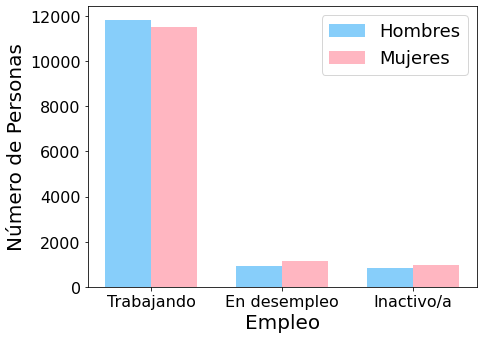

In [14]:
plt.rcParams.update({'font.size': 16})

categs = ['Trabajando', 'En desempleo', 'Inactivo/a']
ps_h = [df.iloc[np.where(df.SEXO == -1)].TRBPRN1.value_counts()[1],
        df.iloc[np.where(df.SEXO == -1)].TRBPRN1.value_counts()[2],
        df.iloc[np.where(df.SEXO == -1)].TRBPRN1.value_counts()[3]]
ps_m = [df.iloc[np.where(df.SEXO == 1)].TRBPRN1.value_counts()[1],
        df.iloc[np.where(df.SEXO == 1)].TRBPRN1.value_counts()[2],
        df.iloc[np.where(df.SEXO == 1)].TRBPRN1.value_counts()[3]]

x = np.arange(len(categs))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[7,5])

rects1 = ax.bar(x - width/2, ps_h, width, label='Hombres', color = 'lightskyblue')
rects2 = ax.bar(x + width/2, ps_m, width, label='Mujeres', color = 'lightpink')

plt.xticks(x, categs)


plt.ylabel('Número de Personas', fontsize = 20)
plt.xlabel('Empleo', fontsize = 20)


fig.tight_layout()

plt.legend(fontsize = 18, loc = 'upper right')

In [30]:
#Beca Erasmus
df.EST_B2_5.value_counts()['2']

9578

### Género y Erasmus

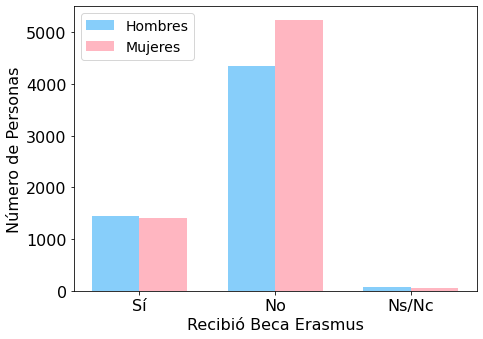

In [34]:
plt.rcParams.update({'font.size': 16})

categs = ['Sí', 'No', 'Ns/Nc']
ps_h = [df.iloc[np.where(df.SEXO == -1)].EST_B2_5.value_counts()['1'],
        df.iloc[np.where(df.SEXO == -1)].EST_B2_5.value_counts()['2'],
        df.iloc[np.where(df.SEXO == -1)].EST_B2_5.value_counts()['9']]
ps_m = [df.iloc[np.where(df.SEXO == 1)].EST_B2_5.value_counts()['1'],
        df.iloc[np.where(df.SEXO == 1)].EST_B2_5.value_counts()['2'],
        df.iloc[np.where(df.SEXO == 1)].EST_B2_5.value_counts()['9']]

x = np.arange(len(categs))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[7,5])

#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['left'].set_color('white')
#ax.spines['bottom'].set_color('white')

rects1 = ax.bar(x - width/2, ps_h, width, label='Hombres', color = 'lightskyblue')
rects2 = ax.bar(x + width/2, ps_m, width, label='Mujeres', color = 'lightpink')

plt.xticks(x, categs)


#plt.rcParams['axes.labelcolor'] = 'white'
#plt.rcParams['xtick.color'] = 'white'
#plt.rcParams['ytick.color'] = 'white'
#plt.rcParams['text.color'] = 'black'
#plt.axhline(0.05, color = 'r', linestyle = '-', linewidth = 10, label = 'p = 0.05')
plt.ylabel('Número de Personas', fontsize = 16)
plt.xlabel('Recibió Beca Erasmus', fontsize = 16)


fig.tight_layout()

plt.legend(fontsize = 14, loc = 'upper left')

Conditions in python, for np.where().

Tienes que poner las distintas condiciones entre parentesis.

Para condición entre todo un objeto y todo otro: and, or

Para condición element-wise: &, |

In [59]:
#df.iloc[np.where((df.SEXO == -1) & (df.SEXO == 1))]
['Ciencias sociales y jurídicas', 'Ingeniería y arquitectura','Ciencias de la salud', 'Artes y humanidades', 'Ciencias']
df.RAMA.value_counts()

12236

In [63]:
df.RAMA.value_counts()[4]

6137

Text(0.5, 1.0, 'Número de personas según ámbito')

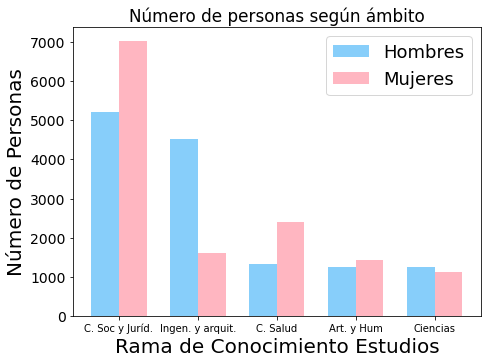

In [148]:
plt.rcParams.update({'font.size': 14})

categs = ['C. Soc y Juríd.', 'Ingen. y arquit.','C. Salud', 'Art. y Hum', 'Ciencias']
ps_h = [df.iloc[np.where(df.SEXO == -1)].RAMA.value_counts()[3],
        df.iloc[np.where(df.SEXO == -1)].RAMA.value_counts()[4],
        df.iloc[np.where(df.SEXO == -1)].RAMA.value_counts()[5],
        df.iloc[np.where(df.SEXO == -1)].RAMA.value_counts()[1],
        df.iloc[np.where(df.SEXO == -1)].RAMA.value_counts()[2]]
ps_m = [df.iloc[np.where(df.SEXO == 1)].RAMA.value_counts()[3],
        df.iloc[np.where(df.SEXO == 1)].RAMA.value_counts()[4],
        df.iloc[np.where(df.SEXO == 1)].RAMA.value_counts()[5],
        df.iloc[np.where(df.SEXO == 1)].RAMA.value_counts()[1],
        df.iloc[np.where(df.SEXO == 1)].RAMA.value_counts()[2]]

x = np.arange(len(categs))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[7,5])

rects1 = ax.bar(x - width/2, ps_h, width, label='Hombres', color = 'lightskyblue')
rects2 = ax.bar(x + width/2, ps_m, width, label='Mujeres', color = 'lightpink')

plt.xticks(x, categs, rotation = 0, fontsize = 10)


plt.ylabel('Número de Personas', fontsize = 20)
plt.xlabel('Rama de Conocimiento Estudios', fontsize = 20)


fig.tight_layout()

plt.legend(fontsize = 18, loc = 'upper right')
plt.title('Número de personas según ámbito')

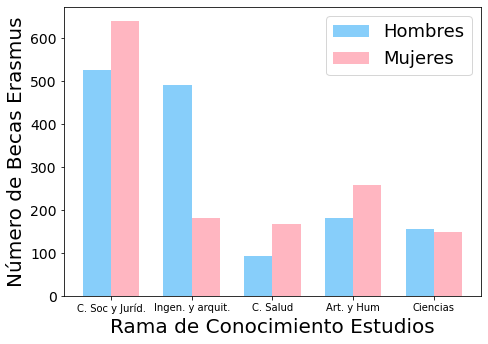

In [146]:

plt.rcParams.update({'font.size': 14})

categs = ['C. Soc y Juríd.', 'Ingen. y arquit.','C. Salud', 'Art. y Hum', 'Ciencias']
ps_h = [df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1'))].RAMA.value_counts()[3],
        df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1'))].RAMA.value_counts()[4],
        df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1'))].RAMA.value_counts()[5],
        df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1'))].RAMA.value_counts()[1],
        df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1'))].RAMA.value_counts()[2]]
ps_m = [df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1'))].RAMA.value_counts()[3],
        df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1'))].RAMA.value_counts()[4],
        df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1'))].RAMA.value_counts()[5],
        df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1'))].RAMA.value_counts()[1],
        df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1'))].RAMA.value_counts()[2]]

x = np.arange(len(categs))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[7,5])

rects1 = ax.bar(x - width/2, ps_h, width, label='Hombres', color = 'lightskyblue')
rects2 = ax.bar(x + width/2, ps_m, width, label='Mujeres', color = 'lightpink')

plt.xticks(x, categs, rotation = 0, fontsize = 10)


plt.ylabel('Número de Becas Erasmus', fontsize = 20)
plt.xlabel('Rama de Conocimiento Estudios', fontsize = 20)


fig.tight_layout()

plt.legend(fontsize = 18, loc = 'upper right')

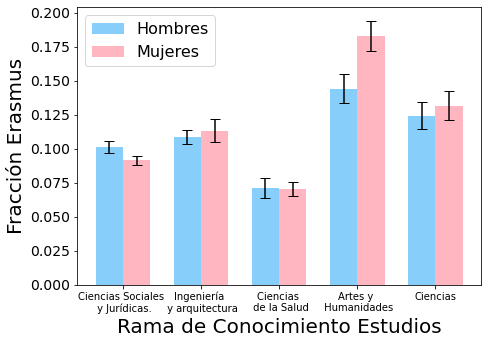

In [156]:

plt.rcParams.update({'font.size': 14})

categs = ['Ciencias Sociales \n y Jurídicas.', 'Ingeniería \n y arquitectura','Ciencias \n de la Salud', 'Artes y \n Humanidades', 'Ciencias']
ps_h = [df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1'))].RAMA.value_counts()[3]/df.iloc[np.where(df.SEXO == -1)].RAMA.value_counts()[3],
        df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1'))].RAMA.value_counts()[4]/df.iloc[np.where(df.SEXO == -1)].RAMA.value_counts()[4],
        df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1'))].RAMA.value_counts()[5]/df.iloc[np.where(df.SEXO == -1)].RAMA.value_counts()[5],
        df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1'))].RAMA.value_counts()[1]/df.iloc[np.where(df.SEXO == -1)].RAMA.value_counts()[1],
        df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1'))].RAMA.value_counts()[2]/df.iloc[np.where(df.SEXO == -1)].RAMA.value_counts()[2]]


err_ps_h = np.sqrt(np.array([len(df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1') & (df.RAMA == 3))].RAMA),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1') & (df.RAMA == 4))].RAMA),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1') & (df.RAMA == 5))].RAMA),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1') & (df.RAMA == 1))].RAMA),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1') & (df.RAMA == 2))].RAMA)]))/np.array(
                            [len(df.iloc[np.where((df.SEXO == -1) & (df.RAMA == 3))].RAMA),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.RAMA == 4))].RAMA),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.RAMA == 5))].RAMA),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.RAMA == 1))].RAMA),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.RAMA == 2))].RAMA)])


ps_m = [df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1'))].RAMA.value_counts()[3]/df.iloc[np.where(df.SEXO == 1)].RAMA.value_counts()[3],
        df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1'))].RAMA.value_counts()[4]/df.iloc[np.where(df.SEXO == 1)].RAMA.value_counts()[4],
        df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1'))].RAMA.value_counts()[5]/df.iloc[np.where(df.SEXO == 1)].RAMA.value_counts()[5],
        df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1'))].RAMA.value_counts()[1]/df.iloc[np.where(df.SEXO == 1)].RAMA.value_counts()[1],
        df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1'))].RAMA.value_counts()[2]/df.iloc[np.where(df.SEXO == 1)].RAMA.value_counts()[2]]



err_ps_m = np.sqrt(np.array([len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1') & (df.RAMA == 3))].RAMA),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1') & (df.RAMA == 4))].RAMA),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1') & (df.RAMA == 5))].RAMA),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1') & (df.RAMA == 1))].RAMA),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1') & (df.RAMA == 2))].RAMA)]))/np.array(
                            [len(df.iloc[np.where((df.SEXO == 1) & (df.RAMA == 3))].RAMA),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.RAMA == 4))].RAMA),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.RAMA == 5))].RAMA),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.RAMA == 1))].RAMA),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.RAMA == 2))].RAMA)])



x = np.arange(len(categs))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[7,5])

rects1 = ax.bar(x - width/2, ps_h, width, label='Hombres', color = 'lightskyblue', yerr = err_ps_h, capsize = 5)
rects2 = ax.bar(x + width/2, ps_m, width, label='Mujeres', color = 'lightpink', yerr = err_ps_m, capsize = 5)

plt.xticks(x, categs, rotation = 0, fontsize = 10)


plt.ylabel('Fracción Erasmus', fontsize = 20)
plt.xlabel('Rama de Conocimiento Estudios', fontsize = 20)


fig.tight_layout()

plt.legend(fontsize = 16, loc = 'upper left')

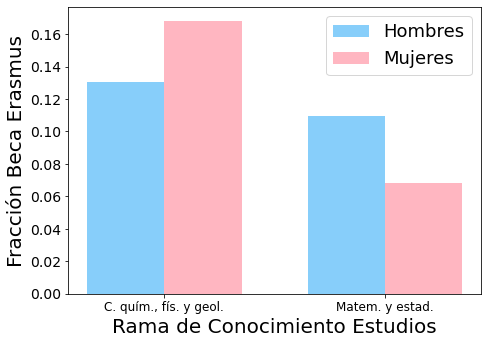

In [99]:

plt.rcParams.update({'font.size': 14})

categs = ['C. quím., fís. y geol.', 'Matem. y estad.']
ps_h = [df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1'))].AMBITO.value_counts()[53]/df.iloc[np.where(df.SEXO == -1)].AMBITO.value_counts()[53],
        df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1'))].AMBITO.value_counts()[54]/df.iloc[np.where(df.SEXO == -1)].AMBITO.value_counts()[54],]
ps_m = [df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1'))].AMBITO.value_counts()[53]/df.iloc[np.where(df.SEXO == 1)].AMBITO.value_counts()[53],
        df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1'))].AMBITO.value_counts()[54]/df.iloc[np.where(df.SEXO == 1)].AMBITO.value_counts()[54],]

x = np.arange(len(categs))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[7,5])

rects1 = ax.bar(x - width/2, ps_h, width, label='Hombres', color = 'lightskyblue')
rects2 = ax.bar(x + width/2, ps_m, width, label='Mujeres', color = 'lightpink')

plt.xticks(x, categs, rotation = 0, fontsize = 12)


plt.ylabel('Fracción Beca Erasmus', fontsize = 20)
plt.xlabel('Rama de Conocimiento Estudios', fontsize = 20)


fig.tight_layout()

plt.legend(fontsize = 18, loc = 'upper right')

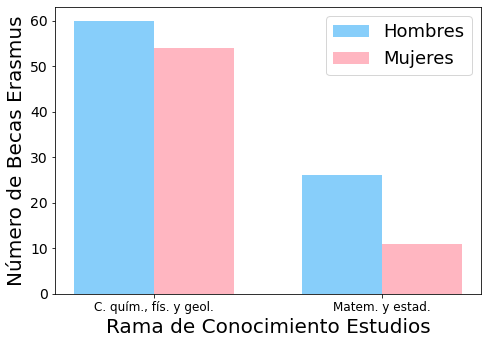

In [104]:

plt.rcParams.update({'font.size': 14})

categs = ['C. quím., fís. y geol.', 'Matem. y estad.']
ps_h = [df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1'))].AMBITO.value_counts()[53],
        df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1'))].AMBITO.value_counts()[54]]
ps_m = [df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1'))].AMBITO.value_counts()[53],
        df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1'))].AMBITO.value_counts()[54]]

x = np.arange(len(categs))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[7,5])

rects1 = ax.bar(x - width/2, ps_h, width, label='Hombres', color = 'lightskyblue')
rects2 = ax.bar(x + width/2, ps_m, width, label='Mujeres', color = 'lightpink')

plt.xticks(x, categs, rotation = 0, fontsize = 12)


plt.ylabel('Número de Becas Erasmus', fontsize = 20)
plt.xlabel('Rama de Conocimiento Estudios', fontsize = 20)


fig.tight_layout()

plt.legend(fontsize = 18, loc = 'upper right')

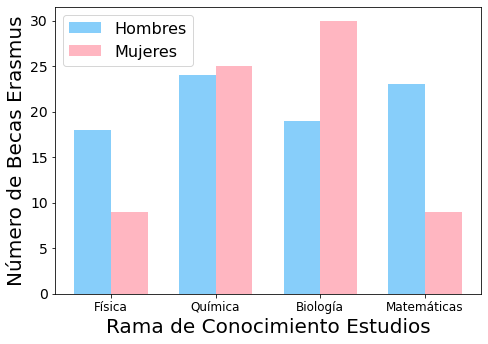

In [109]:
plt.rcParams.update({'font.size': 14})

categs = ['Física', 'Química', 'Biología', 'Matemáticas']
ps_h = [df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1'))].TITU.value_counts()[53301],
        df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1'))].TITU.value_counts()[53101],
        df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1'))].TITU.value_counts()[51101],
        df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1'))].TITU.value_counts()[54101]]
ps_m = [df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1'))].TITU.value_counts()[53301],
        df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1'))].TITU.value_counts()[53101],
        df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1'))].TITU.value_counts()[51101],
        df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1'))].TITU.value_counts()[54101]]

x = np.arange(len(categs))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[7,5])

rects1 = ax.bar(x - width/2, ps_h, width, label='Hombres', color = 'lightskyblue')
rects2 = ax.bar(x + width/2, ps_m, width, label='Mujeres', color = 'lightpink')

plt.xticks(x, categs, rotation = 0, fontsize = 12)


plt.ylabel('Número de Becas Erasmus', fontsize = 20)
plt.xlabel('Rama de Conocimiento Estudios', fontsize = 20)


fig.tight_layout()

plt.legend(fontsize = 16, loc = 'upper left')

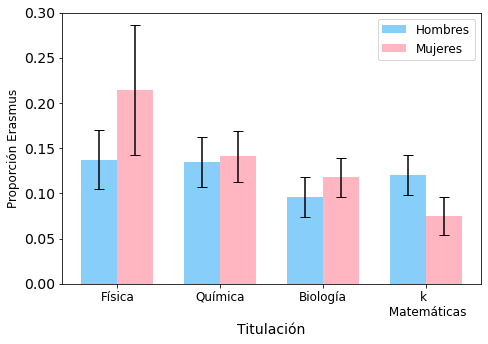

In [151]:
plt.rcParams.update({'font.size': 14})

categs = ['Física', 'Química', 'Biología', 'Matemáticas']
ps_h = [df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1'))].TITU.value_counts()[53301]/df.iloc[np.where(df.SEXO == -1)].TITU.value_counts()[53301],
        df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1'))].TITU.value_counts()[53101]/df.iloc[np.where(df.SEXO == -1)].TITU.value_counts()[53101],
        df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1'))].TITU.value_counts()[51101]/df.iloc[np.where(df.SEXO == -1)].TITU.value_counts()[51101],
        df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1'))].TITU.value_counts()[54101]/df.iloc[np.where(df.SEXO == -1)].TITU.value_counts()[54101]]


err_ps_h = np.sqrt(np.array([len(df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1') & (df.TITU == 53301))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1') & (df.TITU == 53101))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1') & (df.TITU == 51101))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1') & (df.TITU == 51101))].TRBPRN1)]))/np.array(
                            [len(df.iloc[np.where((df.SEXO == -1) & (df.TITU == 53301))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.TITU == 53101))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.TITU == 51101))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.TITU == 51101))].EST_B2_5)])


ps_m = [df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1'))].TITU.value_counts()[53301]/df.iloc[np.where(df.SEXO == 1)].TITU.value_counts()[53301],
        df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1'))].TITU.value_counts()[53101]/df.iloc[np.where(df.SEXO == 1)].TITU.value_counts()[53101],
        df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1'))].TITU.value_counts()[51101]/df.iloc[np.where(df.SEXO == 1)].TITU.value_counts()[51101],
        df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1'))].TITU.value_counts()[54101]/df.iloc[np.where(df.SEXO == 1)].TITU.value_counts()[54101]]


err_ps_m = np.sqrt(np.array([len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1') & (df.TITU == 53301))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1') & (df.TITU == 53101))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1') & (df.TITU == 51101))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1') & (df.TITU == 51101))].TRBPRN1)]))/np.array(
                            [len(df.iloc[np.where((df.SEXO == 1) & (df.TITU == 53301))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.TITU == 53101))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.TITU == 51101))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.TITU == 51101))].EST_B2_5)])


x = np.arange(len(categs))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[7,5])

rects1 = ax.bar(x - width/2, ps_h, width, label='Hombres', color = 'lightskyblue', yerr = err_ps_h, capsize = 5)
rects2 = ax.bar(x + width/2, ps_m, width, label='Mujeres', color = 'lightpink', yerr = err_ps_m, capsize = 5)

plt.xticks(x, categs, rotation = 0, fontsize = 12)


plt.ylabel('Proporción Erasmus', fontsize = 12)
plt.xlabel('Titulación', fontsize = 14)


fig.tight_layout()

plt.legend(fontsize = 12, loc = 'upper right')

In [113]:
df.iloc[np.where(df.SEXO == -1)].TITU.value_counts()[53301]

131

### Erasmus y Empleo

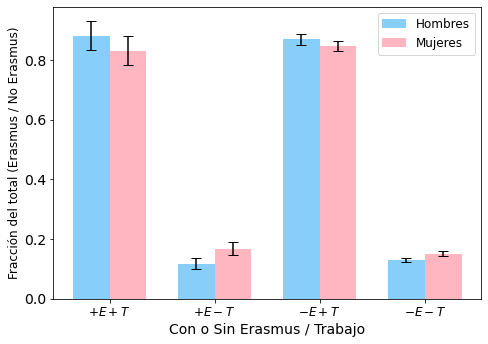

In [15]:
plt.rcParams.update({'font.size': 14})

# + con, - sin, E erasmus, T trabajo

categs = [r'$+E+T$', r'$+E-T$', r'$-E+T$', r'$-E-T$']
ps_h = [len(df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1') & (df.TRBPRN1 == 1))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1'))].EST_B2_5),
        len(df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1') & (df.TRBPRN1 != 1))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1'))].EST_B2_5),
        len(df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 != '1') & (df.TRBPRN1 == 1))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 != '1'))].EST_B2_5),
        len(df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 != '1') & (df.TRBPRN1 != 1))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 != '1'))].EST_B2_5)]


err_ps_h = np.sqrt(np.array([len(df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1') & (df.TRBPRN1 == 1))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1') & (df.TRBPRN1 != 1))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 != '1') & (df.TRBPRN1 == 1))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 != '1') & (df.TRBPRN1 != 1))].TRBPRN1)]))/np.array(
                            [len(df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1'))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1'))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 != '1'))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 != '1'))].EST_B2_5)])



ps_m = [len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1') & (df.TRBPRN1 == 1))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1'))].EST_B2_5),
        len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1') & (df.TRBPRN1 != 1))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1'))].EST_B2_5),
        len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 != '1') & (df.TRBPRN1 == 1))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 != '1'))].EST_B2_5),
        len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 != '1') & (df.TRBPRN1 != 1))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 != '1'))].EST_B2_5)]


err_ps_m = np.sqrt(np.array([len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1') & (df.TRBPRN1 == 1))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1') & (df.TRBPRN1 != 1))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 != '1') & (df.TRBPRN1 == 1))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 != '1') & (df.TRBPRN1 != 1))].TRBPRN1)]))/np.array(
                            [len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1'))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1'))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 != '1'))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 != '1'))].EST_B2_5)])

        
x = np.arange(len(categs))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[7,5])

rects1 = ax.bar(x - width/2, ps_h, width, label='Hombres', color = 'lightskyblue', yerr = 2*err_ps_h, capsize = 5)
rects2 = ax.bar(x + width/2, ps_m, width, label='Mujeres', color = 'lightpink', yerr = 2*err_ps_m, capsize = 5)

plt.xticks(x, categs, rotation = 0, fontsize = 12)


plt.ylabel('Fracción del total (Erasmus / No Erasmus)', fontsize = 12)
plt.xlabel('Con o Sin Erasmus / Trabajo', fontsize = 14)


fig.tight_layout()

plt.legend(fontsize = 12, loc = 'upper right')

In [140]:
print(ps_h)
print(err_ps_h)

[0.8821502412129566, 0.11784975878704342, 0.869235836627141, 0.13076416337285904]
[0.02465685 0.0090122  0.00846034 0.00328143]


In [141]:
print(ps_m)
print(err_ps_m)

[0.8316690442225392, 0.16833095577746077, 0.8481915853358485, 0.15180841466415157]
[0.02435574 0.01095741 0.00834049 0.00352852]


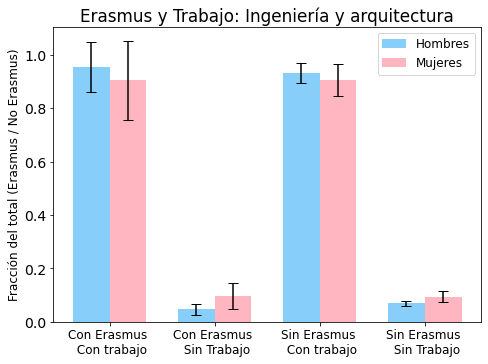

In [22]:
plt.rcParams.update({'font.size': 14})

# + con, - sin, E erasmus, T trabajo
#[3,4,5,1,2]
ramas = ['Ciencias Sociales y Jurídicas', 'Ingeniería y arquitectura','Ciencias de la Salud', 'Artes y Humanidades', 'Ciencias']

rama = 4



categs = ['Con Erasmus \n Con trabajo', 'Con Erasmus \n Sin Trabajo', 'Sin Erasmus \n Con trabajo', 'Sin Erasmus \n Sin Trabajo']
ps_h = [len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.EST_B2_5 == '1') & (df.RAMA == rama) & (df.TRBPRN1 == 1))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.RAMA == rama) & (df.EST_B2_5 == '1'))].EST_B2_5),
        len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.EST_B2_5 == '1') & (df.RAMA == rama) & (df.TRBPRN1 != 1))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.RAMA == rama) & (df.EST_B2_5 == '1'))].EST_B2_5),
        len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.EST_B2_5 != '1') & (df.RAMA == rama) & (df.TRBPRN1 == 1))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.RAMA == rama) & (df.EST_B2_5 != '1'))].EST_B2_5),
        len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.EST_B2_5 != '1') & (df.RAMA == rama) & (df.TRBPRN1 != 1))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.RAMA == rama) & (df.EST_B2_5 != '1'))].EST_B2_5)]


err_ps_h = np.sqrt(np.array([len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.RAMA == rama) & (df.EST_B2_5 == '1') & (df.TRBPRN1 == 1))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.RAMA == rama) & (df.EST_B2_5 == '1') & (df.TRBPRN1 != 1))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.RAMA == rama) & (df.EST_B2_5 != '1') & (df.TRBPRN1 == 1))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.RAMA == rama) & (df.EST_B2_5 != '1') & (df.TRBPRN1 != 1))].TRBPRN1)]))/np.array(
                            [len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.RAMA == rama) & (df.EST_B2_5 == '1'))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.RAMA == rama) & (df.EST_B2_5 == '1'))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.RAMA == rama) & (df.EST_B2_5 != '1'))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.RAMA == rama) & (df.EST_B2_5 != '1'))].EST_B2_5)])



ps_m = [len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1') & (df.EDAD != 3) & (df.RAMA == rama) & (df.TRBPRN1 == 1))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == 1) & (df.EDAD != 3) & (df.RAMA == rama) & (df.EST_B2_5 == '1'))].EST_B2_5),
        len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1') & (df.EDAD != 3) & (df.RAMA == rama) & (df.TRBPRN1 != 1))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == 1) & (df.EDAD != 3) & (df.RAMA == rama) & (df.EST_B2_5 == '1'))].EST_B2_5),
        len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 != '1') & (df.EDAD != 3) & (df.RAMA == rama) & (df.TRBPRN1 == 1))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == 1) & (df.EDAD != 3) & (df.RAMA == rama) & (df.EST_B2_5 != '1'))].EST_B2_5),
        len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 != '1') & (df.EDAD != 3) & (df.RAMA == rama) & (df.TRBPRN1 != 1))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == 1) & (df.EDAD != 3) & (df.RAMA == rama) & (df.EST_B2_5 != '1'))].EST_B2_5)]


err_ps_m = np.sqrt(np.array([len(df.iloc[np.where((df.SEXO == 1) & (df.EDAD != 3) & (df.RAMA == rama) & (df.EST_B2_5 == '1') & (df.TRBPRN1 == 1))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.EDAD != 3) & (df.RAMA == rama) & (df.EST_B2_5 == '1') & (df.TRBPRN1 != 1))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.EDAD != 3) & (df.RAMA == rama) & (df.EST_B2_5 != '1') & (df.TRBPRN1 == 1))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.EDAD != 3) & (df.RAMA == rama) & (df.EST_B2_5 != '1') & (df.TRBPRN1 != 1))].TRBPRN1)]))/np.array(
                            [len(df.iloc[np.where((df.SEXO == 1) & (df.EDAD != 3) & (df.RAMA == rama) & (df.EST_B2_5 == '1'))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.EDAD != 3) & (df.RAMA == rama) & (df.EST_B2_5 == '1'))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.EDAD != 3) & (df.RAMA == rama) & (df.EST_B2_5 != '1'))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.EDAD != 3) & (df.RAMA == rama) & (df.EST_B2_5 != '1'))].EST_B2_5)])

        
x = np.arange(len(categs))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[7,5])

rects1 = ax.bar(x - width/2, ps_h, width, label='Hombres', color = 'lightskyblue', yerr = 2*err_ps_h, capsize = 5)
rects2 = ax.bar(x + width/2, ps_m, width, label='Mujeres', color = 'lightpink', yerr = 2*err_ps_m, capsize = 5)

plt.xticks(x, categs, rotation = 0, fontsize = 12)


plt.ylabel('Fracción del total (Erasmus / No Erasmus)', fontsize = 12)
#plt.xlabel('Con o Sin Erasmus / Trabajo', fontsize = 14)


fig.tight_layout()

plt.title('Erasmus y Trabajo: ' + ramas[rama-3])
plt.legend(fontsize = 12, loc = 'upper right')

In [182]:
len(df.iloc[np.where((df.SEXO == 1) & (df.RAMA == rama) & (df.EST_B2_5 != '1'))].EST_B2_5)

In [184]:
len(df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 != '1') & (df.RAMA == rama) & (df.TRBPRN1 == 1))].TRBPRN1)

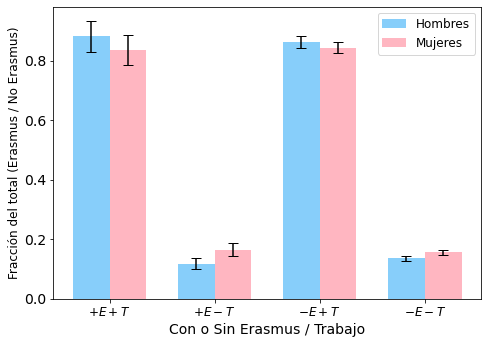

In [19]:
plt.rcParams.update({'font.size': 14})

# + con, - sin, E erasmus, T trabajo

categs = [r'$+E+T$', r'$+E-T$', r'$-E+T$', r'$-E-T$']
ps_h = [len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.EST_B2_5 == '1') & (df.TRBPRN1 == 1))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.EST_B2_5 == '1'))].EST_B2_5),
        len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.EST_B2_5 == '1') & (df.TRBPRN1 != 1))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.EST_B2_5 == '1'))].EST_B2_5),
        len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.EST_B2_5 != '1') & (df.TRBPRN1 == 1))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.EST_B2_5 != '1'))].EST_B2_5),
        len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.EST_B2_5 != '1') & (df.TRBPRN1 != 1))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.EST_B2_5 != '1'))].EST_B2_5)]


err_ps_h = np.sqrt(np.array([len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.EST_B2_5 == '1') & (df.TRBPRN1 == 1))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.EST_B2_5 == '1') & (df.TRBPRN1 != 1))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.EST_B2_5 != '1') & (df.TRBPRN1 == 1))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.EST_B2_5 != '1') & (df.TRBPRN1 != 1))].TRBPRN1)]))/np.array(
                            [len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.EST_B2_5 == '1'))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.EST_B2_5 == '1'))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.EST_B2_5 != '1'))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.EST_B2_5 != '1'))].EST_B2_5)])



ps_m = [len(df.iloc[np.where((df.SEXO == 1) & (df.EDAD != 3) & (df.EST_B2_5 == '1') & (df.TRBPRN1 == 1))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == 1) & (df.EDAD != 3) & (df.EST_B2_5 == '1'))].EST_B2_5),
        len(df.iloc[np.where((df.SEXO == 1) & (df.EDAD != 3) & (df.EST_B2_5 == '1') & (df.TRBPRN1 != 1))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == 1) & (df.EDAD != 3) & (df.EST_B2_5 == '1'))].EST_B2_5),
        len(df.iloc[np.where((df.SEXO == 1) & (df.EDAD != 3) & (df.EST_B2_5 != '1') & (df.TRBPRN1 == 1))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == 1) & (df.EDAD != 3) & (df.EST_B2_5 != '1'))].EST_B2_5),
        len(df.iloc[np.where((df.SEXO == 1) & (df.EDAD != 3) & (df.EST_B2_5 != '1') & (df.TRBPRN1 != 1))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == 1) & (df.EDAD != 3) & (df.EST_B2_5 != '1'))].EST_B2_5)]


err_ps_m = np.sqrt(np.array([len(df.iloc[np.where((df.SEXO == 1) & (df.EDAD != 3) & (df.EST_B2_5 == '1') & (df.TRBPRN1 == 1))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.EDAD != 3) & (df.EST_B2_5 == '1') & (df.TRBPRN1 != 1))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.EDAD != 3) & (df.EST_B2_5 != '1') & (df.TRBPRN1 == 1))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.EDAD != 3) & (df.EST_B2_5 != '1') & (df.TRBPRN1 != 1))].TRBPRN1)]))/np.array(
                            [len(df.iloc[np.where((df.SEXO == 1) & (df.EDAD != 3) & (df.EST_B2_5 == '1'))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.EDAD != 3) & (df.EST_B2_5 == '1'))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.EDAD != 3) & (df.EST_B2_5 != '1'))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.EDAD != 3) & (df.EST_B2_5 != '1'))].EST_B2_5)])

        
x = np.arange(len(categs))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[7,5])

rects1 = ax.bar(x - width/2, ps_h, width, label='Hombres', color = 'lightskyblue', yerr = 2*err_ps_h, capsize = 5)
rects2 = ax.bar(x + width/2, ps_m, width, label='Mujeres', color = 'lightpink', yerr = 2*err_ps_m, capsize = 5)

plt.xticks(x, categs, rotation = 0, fontsize = 12)


plt.ylabel('Fracción del total (Erasmus / No Erasmus)', fontsize = 12)
plt.xlabel('Con o Sin Erasmus / Trabajo', fontsize = 14)


fig.tight_layout()

plt.legend(fontsize = 12, loc = 'upper right')

### Erasmus y tiempo hasta empleo

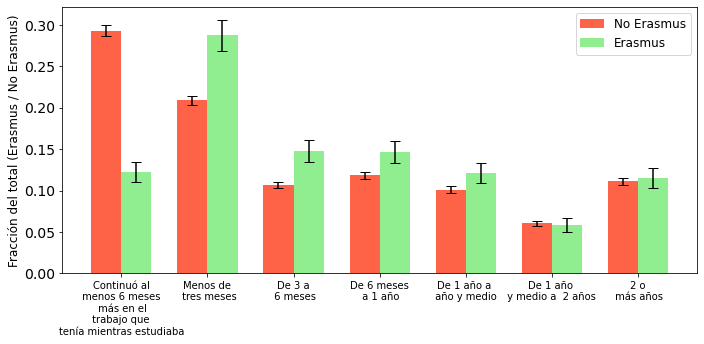

In [144]:
rama = 4

df_a =  df.iloc[np.where((df.HATR_E11 != ' ') & (df.HATR_E11 != '9'))].copy()

plt.rcParams.update({'font.size': 14})

# + con, - sin, E erasmus, T trabajo

categs = ['Continuó al\n menos 6 meses \n más en el\n trabajo que \ntenía mientras estudiaba', 
          'Menos de\n tres meses', 'De 3 a\n 6 meses', 'De 6 meses\n a 1 año', 'De 1 año a \n año y medio ', 
          'De 1 año \n y medio a  2 años ','2 o\n más años']

# No fueron de Erasmus
ps_h = [len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.HATR_E11 == '0'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.HATR_E11 == '1'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.HATR_E11 == '2'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.HATR_E11 == '3'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.HATR_E11 == '4'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.HATR_E11 == '5'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.HATR_E11 == '6'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5)]



err_ps_h = np.sqrt(np.array([len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.HATR_E11 == '0'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.HATR_E11 == '1'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.HATR_E11 == '2'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.HATR_E11 == '3'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.HATR_E11 == '4'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.HATR_E11 == '5'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.HATR_E11 == '6'))].TRBPRN1)]))/np.array(
                            [len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5)])



# Sí fueron de Erasmus
ps_m = [len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.HATR_E11 == '0'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.HATR_E11 == '1'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.HATR_E11 == '2'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.HATR_E11 == '3'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.HATR_E11 == '4'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.HATR_E11 == '5'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.HATR_E11 == '6'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5)]



err_ps_m = np.sqrt(np.array([len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.HATR_E11 == '0'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.HATR_E11 == '1'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.HATR_E11 == '2'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.HATR_E11 == '3'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.HATR_E11 == '4'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.HATR_E11 == '5'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.HATR_E11 == '6'))].TRBPRN1)]))/np.array(
                            [len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5)])



        
x = np.arange(len(categs))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[10,5])

rects1 = ax.bar(x - width/2, ps_h, width, label='No Erasmus', color = 'tomato', yerr = 2*err_ps_h, capsize = 5)
rects2 = ax.bar(x + width/2, ps_m, width, label='Erasmus', color = 'lightgreen', yerr = 2*err_ps_m, capsize = 5)

plt.xticks(x, categs, rotation = 0, fontsize = 10)


plt.ylabel('Fracción del total (Erasmus / No Erasmus)', fontsize = 12)
#plt.xlabel('Con o Sin Erasmus / Trabajo', fontsize = 14)


fig.tight_layout()

plt.legend(fontsize = 12, loc = 'upper right')
#ramas = ['Ciencias Sociales y Jurídicas', 'Ingeniería y arquitectura','Ciencias de la Salud', 'Artes y Humanidades', 'Ciencias']
#plt.title('Erasmus y Trabajo: ' + ramas[rama-3])

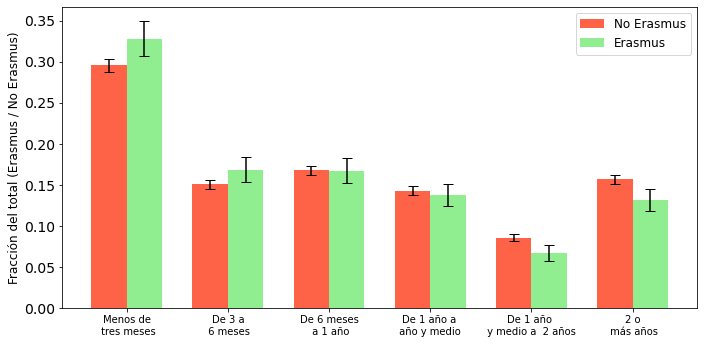

In [145]:
rama = 4

df_a =  df.iloc[np.where((df.HATR_E11 != ' ') & (df.HATR_E11 != '9') & (df_a.HATR_E11 != '0'))].copy()

plt.rcParams.update({'font.size': 14})

# + con, - sin, E erasmus, T trabajo

categs = ['Menos de\n tres meses', 'De 3 a\n 6 meses', 'De 6 meses\n a 1 año', 'De 1 año a \n año y medio ', 
          'De 1 año \n y medio a  2 años ','2 o\n más años']

# No fueron de Erasmus
ps_h = [len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.HATR_E11 == '1'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.HATR_E11 == '2'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.HATR_E11 == '3'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.HATR_E11 == '4'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.HATR_E11 == '5'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.HATR_E11 == '6'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5)]



err_ps_h = np.sqrt(np.array([len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.HATR_E11 == '1'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.HATR_E11 == '2'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.HATR_E11 == '3'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.HATR_E11 == '4'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.HATR_E11 == '5'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.HATR_E11 == '6'))].TRBPRN1)]))/np.array(
                            [len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5)])



# Sí fueron de Erasmus
ps_m = [len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.HATR_E11 == '1'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.HATR_E11 == '2'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.HATR_E11 == '3'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.HATR_E11 == '4'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.HATR_E11 == '5'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.HATR_E11 == '6'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5)]



err_ps_m = np.sqrt(np.array([len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.HATR_E11 == '1'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.HATR_E11 == '2'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.HATR_E11 == '3'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.HATR_E11 == '4'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.HATR_E11 == '5'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.HATR_E11 == '6'))].TRBPRN1)]))/np.array(
                            [len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5)])



        
x = np.arange(len(categs))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[10,5])

rects1 = ax.bar(x - width/2, ps_h, width, label='No Erasmus', color = 'tomato', yerr = 2*err_ps_h, capsize = 5)
rects2 = ax.bar(x + width/2, ps_m, width, label='Erasmus', color = 'lightgreen', yerr = 2*err_ps_m, capsize = 5)

plt.xticks(x, categs, rotation = 0, fontsize = 10)


plt.ylabel('Fracción del total (Erasmus / No Erasmus)', fontsize = 12)
#plt.xlabel('Con o Sin Erasmus / Trabajo', fontsize = 14)


fig.tight_layout()

plt.legend(fontsize = 12, loc = 'upper right')
#ramas = ['Ciencias Sociales y Jurídicas', 'Ingeniería y arquitectura','Ciencias de la Salud', 'Artes y Humanidades', 'Ciencias']
#plt.title('Erasmus y Trabajo: ' + ramas[rama-3])

In [142]:
len(df_a.iloc[np.where(df_a.EST_B2_5 != '1')].TRBPRN1)

In [243]:
import random

tests = 10
gano = 0
ganadas = []

for ff in range(1000):
    gano = 0
    for i in range(tests):
        a = [random.randint(1,6) for i in range(6)]
        c = 6 in a
        #print(c)
        gano += c

    ganadas.append(tests-gano)
    
np.std(ganadas)/tests

(array([ 18.,  86., 469.,   0., 225., 187.,  14.,   1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]),
 <BarContainer object of 8 artists>)

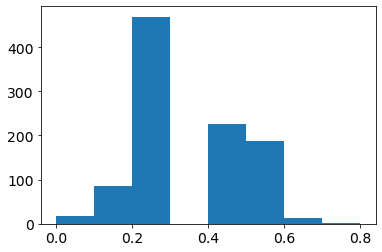

In [238]:
plt.hist(np.array(ganadas)/tests,bins = 8)

### Erasmus y estado civil

In [194]:
df.HO_F1

41

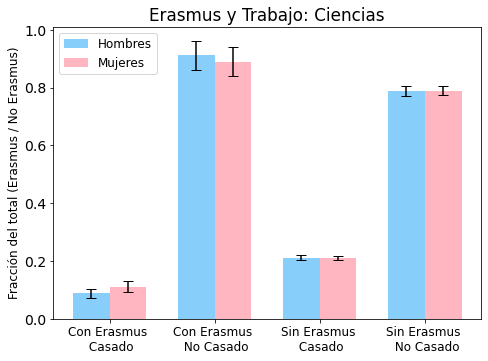

In [197]:
plt.rcParams.update({'font.size': 14})

# + con, - sin, E erasmus, T trabajo

#ramas = ['Ciencias Sociales y Jurídicas', 'Ingeniería y arquitectura','Ciencias de la Salud', 'Artes y Humanidades', 'Ciencias']

rama = 2



categs = ['Con Erasmus \n Casado', 'Con Erasmus \n No Casado', 'Sin Erasmus \n Casado', 'Sin Erasmus \n No Casado']
ps_h = [len(df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1') & (df.HO_F1 == rama))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1'))].EST_B2_5),
        len(df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1') & (df.HO_F1 != rama))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1'))].EST_B2_5),
        len(df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 != '1') & (df.HO_F1 == rama))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 != '1'))].EST_B2_5),
        len(df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 != '1') & (df.HO_F1 != rama))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 != '1'))].EST_B2_5)]


err_ps_h = np.sqrt(np.array([len(df.iloc[np.where((df.SEXO == -1) & (df.HO_F1 == rama) & (df.EST_B2_5 == '1'))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.HO_F1 != rama) & (df.EST_B2_5 == '1'))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.HO_F1 == rama) & (df.EST_B2_5 != '1'))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.HO_F1 != rama) & (df.EST_B2_5 != '1'))].TRBPRN1)]))/np.array(
                            [len(df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1'))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 == '1'))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 != '1'))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.EST_B2_5 != '1'))].EST_B2_5)])



ps_m = [len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1') & (df.HO_F1 == rama))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1'))].EST_B2_5),
        len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1') & (df.HO_F1 != rama))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1'))].EST_B2_5),
        len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 != '1') & (df.HO_F1 == rama))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 != '1'))].EST_B2_5),
        len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 != '1') & (df.HO_F1 != rama))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 != '1'))].EST_B2_5)]


err_ps_m = np.sqrt(np.array([len(df.iloc[np.where((df.SEXO == 1) & (df.HO_F1 == rama) & (df.EST_B2_5 == '1'))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.HO_F1 != rama) & (df.EST_B2_5 == '1'))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.HO_F1 == rama) & (df.EST_B2_5 != '1'))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.HO_F1 != rama) & (df.EST_B2_5 != '1'))].TRBPRN1)]))/np.array(
                            [len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1'))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1'))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 != '1'))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 != '1'))].EST_B2_5)])

        
x = np.arange(len(categs))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[7,5])

rects1 = ax.bar(x - width/2, ps_h, width, label='Hombres', color = 'lightskyblue', yerr = 2*err_ps_h, capsize = 5)
rects2 = ax.bar(x + width/2, ps_m, width, label='Mujeres', color = 'lightpink', yerr = 2*err_ps_m, capsize = 5)

plt.xticks(x, categs, rotation = 0, fontsize = 12)


plt.ylabel('Fracción del total (Erasmus / No Erasmus)', fontsize = 12)
#plt.xlabel('Con o Sin Erasmus / Trabajo', fontsize = 14)


fig.tight_layout()

plt.title('Erasmus y Trabajo: ' + ramas[rama-3])
plt.legend(fontsize = 12, loc = 'upper left')

In [204]:
len(df.SEXO.iloc[np.where((df.HO_F1 == 2) & (df.SEXO == 1) & (df.EST_B2_5 != '1'))])

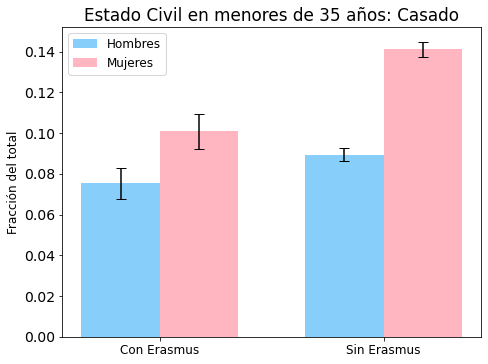

In [240]:
plt.rcParams.update({'font.size': 14})

# + con, - sin, E erasmus, T trabajo


rama = 2 # 2 Es casado, 1 es soltero


categs = ['Con Erasmus', 'Sin Erasmus']
ps_h = [len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.EST_B2_5 == '1') & (df.HO_F1 == rama))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.EST_B2_5 == '1'))].EST_B2_5),
        len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.EST_B2_5 != '1') & (df.HO_F1 == rama))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.EST_B2_5 != '1'))].EST_B2_5)]


err_ps_h = np.sqrt(np.array([len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.HO_F1 == rama) & (df.EST_B2_5 == '1'))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.HO_F1 == rama) & (df.EST_B2_5 != '1'))].TRBPRN1)]))/np.array(
                            [len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.EST_B2_5 == '1'))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.EST_B2_5 != '1'))].EST_B2_5)])



ps_m = [len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 == '1') & (df.EDAD != 3) & (df.HO_F1 == rama))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.EST_B2_5 == '1'))].EST_B2_5),
        len(df.iloc[np.where((df.SEXO == 1) & (df.EST_B2_5 != '1') & (df.EDAD != 3) & (df.HO_F1 == rama))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == -1) & (df.EDAD != 3) & (df.EST_B2_5 != '1'))].EST_B2_5)]


err_ps_m = np.sqrt(np.array([len(df.iloc[np.where((df.SEXO == 1) & (df.EDAD != 3) & (df.HO_F1 == rama) & (df.EST_B2_5 == '1'))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.EDAD != 3) & (df.HO_F1 == rama) & (df.EST_B2_5 != '1'))].TRBPRN1)]))/np.array(
                            [len(df.iloc[np.where((df.SEXO == 1) & (df.EDAD != 3) & (df.EST_B2_5 == '1'))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.EDAD != 3) & (df.EST_B2_5 != '1'))].EST_B2_5)])

        
x = np.arange(len(categs))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[7,5])

rects1 = ax.bar(x - width/2, ps_h, width, label='Hombres', color = 'lightskyblue', yerr = err_ps_h, capsize = 5)
rects2 = ax.bar(x + width/2, ps_m, width, label='Mujeres', color = 'lightpink', yerr = err_ps_m, capsize = 5)

plt.xticks(x, categs, rotation = 0, fontsize = 12)


plt.ylabel('Fracción del total', fontsize = 12)
#plt.xlabel('Con o Sin Erasmus / Trabajo', fontsize = 14)


fig.tight_layout()

plt.title('Estado Civil en menores de 35 años: Casado')
plt.legend(fontsize = 12, loc = 'upper left')

## Prácticas externas y Empleo

In [24]:
df.HL_E1.iloc[np.where(df.SEXO == 1)].value_counts()

1    6751
4    2999
3    2260
2    1585
Name: HL_E1, dtype: int64

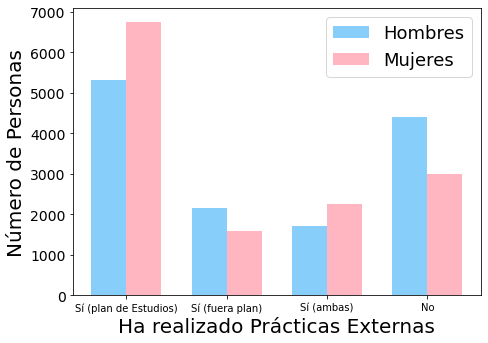

In [25]:
plt.rcParams.update({'font.size': 14})

categs = ['Sí (plan de Estudios)', 'Sí (fuera plan)','Sí (ambas)', 'No']
ps_h = [df.iloc[np.where(df.SEXO == -1)].HL_E1.value_counts()[1],
        df.iloc[np.where(df.SEXO == -1)].HL_E1.value_counts()[2],
        df.iloc[np.where(df.SEXO == -1)].HL_E1.value_counts()[3],
        df.iloc[np.where(df.SEXO == -1)].HL_E1.value_counts()[4]]
ps_m = [df.iloc[np.where(df.SEXO == 1)].HL_E1.value_counts()[1],
        df.iloc[np.where(df.SEXO == 1)].HL_E1.value_counts()[2],
        df.iloc[np.where(df.SEXO == 1)].HL_E1.value_counts()[3],
        df.iloc[np.where(df.SEXO == 1)].HL_E1.value_counts()[4]]

x = np.arange(len(categs))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[7,5])

rects1 = ax.bar(x - width/2, ps_h, width, label='Hombres', color = 'lightskyblue')
rects2 = ax.bar(x + width/2, ps_m, width, label='Mujeres', color = 'lightpink')

plt.xticks(x, categs, rotation = 0, fontsize = 10)


plt.ylabel('Número de Personas', fontsize = 20)
plt.xlabel('Ha realizado Prácticas Externas', fontsize = 20)


fig.tight_layout()

plt.legend(fontsize = 18, loc = 'upper right')
#plt.title('Número de personas según ámbito')

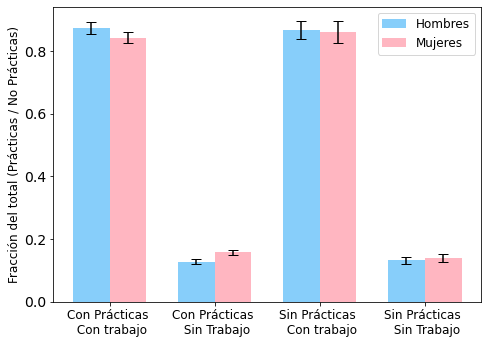

In [40]:
plt.rcParams.update({'font.size': 14})

# + con, - sin, E erasmus, T trabajo

categs = ['Con Prácticas \n Con trabajo', 'Con Prácticas \n Sin Trabajo', 'Sin Prácticas \n Con trabajo', 'Sin Prácticas \n Sin Trabajo']
ps_h = [len(df.iloc[np.where((df.SEXO == -1) & (df.HL_E1 != 4) & (df.TRBPRN1 == 1))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == -1) & (df.HL_E1 != 4))].EST_B2_5),
        len(df.iloc[np.where((df.SEXO == -1) & (df.HL_E1 != 4) & (df.TRBPRN1 != 1))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == -1) & (df.HL_E1 != 4))].EST_B2_5),
        len(df.iloc[np.where((df.SEXO == -1) & (df.HL_E1 == 4) & (df.TRBPRN1 == 1))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == -1) & (df.HL_E1 == 4))].EST_B2_5),
        len(df.iloc[np.where((df.SEXO == -1) & (df.HL_E1 == 4) & (df.TRBPRN1 != 1))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == -1) & (df.HL_E1 == 4))].EST_B2_5)]


err_ps_h = np.sqrt(np.array([len(df.iloc[np.where((df.SEXO == -1) & (df.HL_E1 != 4) & (df.TRBPRN1 == 1))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.HL_E1 != 4) & (df.TRBPRN1 != 1))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.HL_E1 == 4) & (df.TRBPRN1 == 1))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.HL_E1 == 4) & (df.TRBPRN1 != 1))].TRBPRN1)]))/np.array(
                            [len(df.iloc[np.where((df.SEXO == -1) & (df.HL_E1 != 4))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.HL_E1 != 4))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.HL_E1 == 4))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.HL_E1 == 4))].EST_B2_5)])



ps_m = [len(df.iloc[np.where((df.SEXO == 1) & (df.HL_E1 != 4) & (df.TRBPRN1 == 1))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == 1) & (df.HL_E1 != 4))].EST_B2_5),
        len(df.iloc[np.where((df.SEXO == 1) & (df.HL_E1 != 4) & (df.TRBPRN1 != 1))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == 1) & (df.HL_E1 != 4))].EST_B2_5),
        len(df.iloc[np.where((df.SEXO == 1) & (df.HL_E1 == 4) & (df.TRBPRN1 == 1))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == 1) & (df.HL_E1 == 4))].EST_B2_5),
        len(df.iloc[np.where((df.SEXO == 1) & (df.HL_E1 == 4) & (df.TRBPRN1 != 1))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == 1) & (df.HL_E1 == 4))].EST_B2_5)]


err_ps_m = np.sqrt(np.array([len(df.iloc[np.where((df.SEXO == 1) & (df.HL_E1 != 4) & (df.TRBPRN1 == 1))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.HL_E1 != 4) & (df.TRBPRN1 != 1))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.HL_E1 == 4) & (df.TRBPRN1 == 1))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.HL_E1 == 4) & (df.TRBPRN1 != 1))].TRBPRN1)]))/np.array(
                            [len(df.iloc[np.where((df.SEXO == 1) & (df.HL_E1 != 4))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.HL_E1 != 4))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.HL_E1 == 4))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.HL_E1 == 4))].EST_B2_5)])

        
x = np.arange(len(categs))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[7,5])

rects1 = ax.bar(x - width/2, ps_h, width, label='Hombres', color = 'lightskyblue', yerr = 2*err_ps_h, capsize = 5)
rects2 = ax.bar(x + width/2, ps_m, width, label='Mujeres', color = 'lightpink', yerr = 2*err_ps_m, capsize = 5)

plt.xticks(x, categs, rotation = 0, fontsize = 12)


plt.ylabel('Fracción del total (Prácticas / No Prácticas)', fontsize = 12)
#plt.xlabel('Con o Sin Erasmus / Trabajo', fontsize = 14)


fig.tight_layout()

plt.legend(fontsize = 12, loc = 'upper right')

Text(0.5, 1.0, 'Práctias externas y Trabajo: Ciencias')

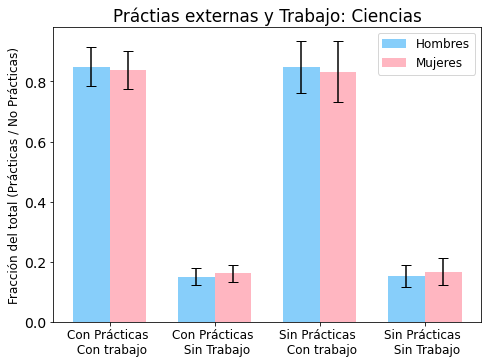

In [14]:
rama = 2


plt.rcParams.update({'font.size': 14})

# + con, - sin, E erasmus, T trabajo

categs = ['Con Prácticas \n Con trabajo', 'Con Prácticas \n Sin Trabajo', 'Sin Prácticas \n Con trabajo', 'Sin Prácticas \n Sin Trabajo']
ps_h = [len(df.iloc[np.where((df.SEXO == -1) & (df.HL_E1 != 4) & (df.RAMA == rama) & (df.TRBPRN1 == 1))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == -1) & (df.RAMA == rama) & (df.HL_E1 != 4))].EST_B2_5),
        len(df.iloc[np.where((df.SEXO == -1) & (df.HL_E1 != 4) & (df.RAMA == rama) & (df.TRBPRN1 != 1))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == -1) & (df.RAMA == rama) & (df.HL_E1 != 4))].EST_B2_5),
        len(df.iloc[np.where((df.SEXO == -1) & (df.HL_E1 == 4) & (df.RAMA == rama) & (df.TRBPRN1 == 1))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == -1) & (df.RAMA == rama) & (df.HL_E1 == 4))].EST_B2_5),
        len(df.iloc[np.where((df.SEXO == -1) & (df.HL_E1 == 4) & (df.RAMA == rama) & (df.TRBPRN1 != 1))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == -1) & (df.RAMA == rama) & (df.HL_E1 == 4))].EST_B2_5)]


err_ps_h = np.sqrt(np.array([len(df.iloc[np.where((df.SEXO == -1) & (df.RAMA == rama) & (df.HL_E1 != 4) & (df.TRBPRN1 == 1))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.RAMA == rama) & (df.HL_E1 != 4) & (df.TRBPRN1 != 1))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.RAMA == rama) & (df.HL_E1 == 4) & (df.TRBPRN1 == 1))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.RAMA == rama) & (df.HL_E1 == 4) & (df.TRBPRN1 != 1))].TRBPRN1)]))/np.array(
                            [len(df.iloc[np.where((df.SEXO == -1) & (df.RAMA == rama) & (df.HL_E1 != 4))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.RAMA == rama) & (df.HL_E1 != 4))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.RAMA == rama) & (df.HL_E1 == 4))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == -1) & (df.RAMA == rama) & (df.HL_E1 == 4))].EST_B2_5)])



ps_m = [len(df.iloc[np.where((df.SEXO == 1) & (df.HL_E1 != 4) & (df.RAMA == rama) & (df.TRBPRN1 == 1))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == 1) & (df.RAMA == rama) & (df.HL_E1 != 4))].EST_B2_5),
        len(df.iloc[np.where((df.SEXO == 1) & (df.HL_E1 != 4) & (df.RAMA == rama) & (df.TRBPRN1 != 1))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == 1) & (df.RAMA == rama) & (df.HL_E1 != 4))].EST_B2_5),
        len(df.iloc[np.where((df.SEXO == 1) & (df.HL_E1 == 4) & (df.RAMA == rama) & (df.TRBPRN1 == 1))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == 1) & (df.RAMA == rama) & (df.HL_E1 == 4))].EST_B2_5),
        len(df.iloc[np.where((df.SEXO == 1) & (df.HL_E1 == 4) & (df.RAMA == rama) & (df.TRBPRN1 != 1))].TRBPRN1)/len(df.iloc[np.where((df.SEXO == 1) & (df.RAMA == rama) & (df.HL_E1 == 4))].EST_B2_5)]


err_ps_m = np.sqrt(np.array([len(df.iloc[np.where((df.SEXO == 1) & (df.RAMA == rama) & (df.HL_E1 != 4) & (df.TRBPRN1 == 1))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.RAMA == rama) & (df.HL_E1 != 4) & (df.TRBPRN1 != 1))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.RAMA == rama) & (df.HL_E1 == 4) & (df.TRBPRN1 == 1))].TRBPRN1),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.RAMA == rama) & (df.HL_E1 == 4) & (df.TRBPRN1 != 1))].TRBPRN1)]))/np.array(
                            [len(df.iloc[np.where((df.SEXO == 1) & (df.RAMA == rama) & (df.HL_E1 != 4))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.RAMA == rama) & (df.HL_E1 != 4))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.RAMA == rama) & (df.HL_E1 == 4))].EST_B2_5),
                             len(df.iloc[np.where((df.SEXO == 1) & (df.RAMA == rama) & (df.HL_E1 == 4))].EST_B2_5)])

        
x = np.arange(len(categs))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[7,5])

rects1 = ax.bar(x - width/2, ps_h, width, label='Hombres', color = 'lightskyblue', yerr = 2*err_ps_h, capsize = 5)
rects2 = ax.bar(x + width/2, ps_m, width, label='Mujeres', color = 'lightpink', yerr = 2*err_ps_m, capsize = 5)

plt.xticks(x, categs, rotation = 0, fontsize = 12)


plt.ylabel('Fracción del total (Prácticas / No Prácticas)', fontsize = 12)
#plt.xlabel('Con o Sin Erasmus / Trabajo', fontsize = 14)


fig.tight_layout()

plt.legend(fontsize = 12, loc = 'upper right')
ramas = ['Ciencias Sociales y Jurídicas', 'Ingeniería y arquitectura','Ciencias de la Salud', 'Artes y Humanidades', 'Ciencias']
plt.title('Práctias externas y Trabajo: ' + ramas[rama-3])

In [42]:
df.HATR_E11.iloc[np.where((df.HATR_E11 != ' ') & (df.HATR_E11 != '9'))].value_counts()

0    7261
1    5793
3    3193
2    2955
6    2912
4    2722
5    1573
Name: HATR_E11, dtype: int64

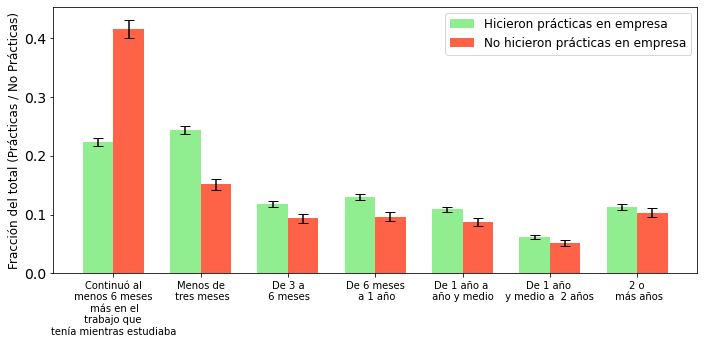

In [60]:
rama = 4

df_a =  df.iloc[np.where((df.HATR_E11 != ' ') & (df.HATR_E11 != '9'))].copy()

plt.rcParams.update({'font.size': 14})

# + con, - sin, E erasmus, T trabajo

categs = ['Continuó al\n menos 6 meses \n más en el\n trabajo que \ntenía mientras estudiaba', 
          'Menos de\n tres meses', 'De 3 a\n 6 meses', 'De 6 meses\n a 1 año', 'De 1 año a \n año y medio ', 
          'De 1 año \n y medio a  2 años ','2 o\n más años']

# Con prácticas externas
ps_h = [len(df_a.iloc[np.where((df_a.HL_E1 != 4) & (df_a.HATR_E11 == '0'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.HL_E1 != 4))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.HL_E1 != 4) & (df_a.HATR_E11 == '1'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.HL_E1 != 4))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.HL_E1 != 4) & (df_a.HATR_E11 == '2'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.HL_E1 != 4))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.HL_E1 != 4) & (df_a.HATR_E11 == '3'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.HL_E1 != 4))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.HL_E1 != 4) & (df_a.HATR_E11 == '4'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.HL_E1 != 4))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.HL_E1 != 4) & (df_a.HATR_E11 == '5'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.HL_E1 != 4))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.HL_E1 != 4) & (df_a.HATR_E11 == '6'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.HL_E1 != 4))].EST_B2_5)]



err_ps_h = np.sqrt(np.array([len(df_a.iloc[np.where((df_a.HL_E1 != 4) & (df_a.HATR_E11 == '0'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.HL_E1 != 4) & (df_a.HATR_E11 == '1'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.HL_E1 != 4) & (df_a.HATR_E11 == '2'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.HL_E1 != 4) & (df_a.HATR_E11 == '3'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.HL_E1 != 4) & (df_a.HATR_E11 == '4'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.HL_E1 != 4) & (df_a.HATR_E11 == '5'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.HL_E1 != 4) & (df_a.HATR_E11 == '6'))].TRBPRN1)]))/np.array(
                            [len(df_a.iloc[np.where((df_a.HL_E1 != 4))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.HL_E1 != 4))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.HL_E1 != 4))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.HL_E1 != 4))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.HL_E1 != 4))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.HL_E1 != 4))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.HL_E1 != 4))].EST_B2_5)])



# Sin prácticas externas
ps_m = [len(df_a.iloc[np.where((df_a.HL_E1 == 4) & (df_a.HATR_E11 == '0'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.HL_E1 == 4))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.HL_E1 == 4) & (df_a.HATR_E11 == '1'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.HL_E1 == 4))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.HL_E1 == 4) & (df_a.HATR_E11 == '2'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.HL_E1 == 4))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.HL_E1 == 4) & (df_a.HATR_E11 == '3'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.HL_E1 == 4))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.HL_E1 == 4) & (df_a.HATR_E11 == '4'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.HL_E1 == 4))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.HL_E1 == 4) & (df_a.HATR_E11 == '5'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.HL_E1 == 4))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.HL_E1 == 4) & (df_a.HATR_E11 == '6'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.HL_E1 == 4))].EST_B2_5)]



err_ps_m = np.sqrt(np.array([len(df_a.iloc[np.where((df_a.HL_E1 == 4) & (df_a.HATR_E11 == '0'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.HL_E1 == 4) & (df_a.HATR_E11 == '1'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.HL_E1 == 4) & (df_a.HATR_E11 == '2'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.HL_E1 == 4) & (df_a.HATR_E11 == '3'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.HL_E1 == 4) & (df_a.HATR_E11 == '4'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.HL_E1 == 4) & (df_a.HATR_E11 == '5'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.HL_E1 == 4) & (df_a.HATR_E11 == '6'))].TRBPRN1)]))/np.array(
                            [len(df_a.iloc[np.where((df_a.HL_E1 == 4))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.HL_E1 == 4))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.HL_E1 == 4))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.HL_E1 == 4))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.HL_E1 == 4))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.HL_E1 == 4))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.HL_E1 == 4))].EST_B2_5)])



        
x = np.arange(len(categs))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[10,5])

rects1 = ax.bar(x - width/2, ps_h, width, label='Hicieron prácticas en empresa', color = 'lightgreen', yerr = 2*err_ps_h, capsize = 5)
rects2 = ax.bar(x + width/2, ps_m, width, label='No hicieron prácticas en empresa', color = 'tomato', yerr = 2*err_ps_m, capsize = 5)

plt.xticks(x, categs, rotation = 0, fontsize = 10)


plt.ylabel('Fracción del total (Prácticas / No Prácticas)', fontsize = 12)
#plt.xlabel('Con o Sin Erasmus / Trabajo', fontsize = 14)


fig.tight_layout()

plt.legend(fontsize = 12, loc = 'upper right')
#ramas = ['Ciencias Sociales y Jurídicas', 'Ingeniería y arquitectura','Ciencias de la Salud', 'Artes y Humanidades', 'Ciencias']
#plt.title('Erasmus y Trabajo: ' + ramas[rama-3])

Text(0.5, 1.0, 'Prácticas de Empresa y Trabajo: Ciencias de la Salud')

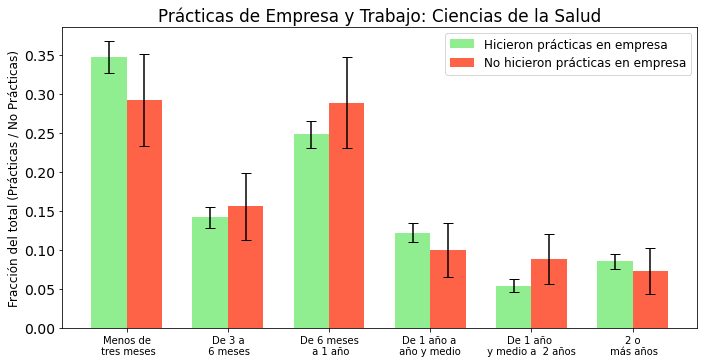

In [135]:
rama = 5

df_a =  df.iloc[np.where((df.HATR_E11 != ' ') & (df.HATR_E11 != '9') & (df.HATR_E11 != '0') & (df.RAMA == rama))].copy()

plt.rcParams.update({'font.size': 14})

# + con, - sin, E erasmus, T trabajo

categs = [ 'Menos de\n tres meses', 'De 3 a\n 6 meses', 'De 6 meses\n a 1 año', 'De 1 año a \n año y medio ', 
          'De 1 año \n y medio a  2 años ','2 o\n más años']

# Con prácticas externas
ps_h = [len(df_a.iloc[np.where((df_a.HL_E1 != 4) & (df_a.HATR_E11 == '1'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.HL_E1 != 4))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.HL_E1 != 4) & (df_a.HATR_E11 == '2'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.HL_E1 != 4))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.HL_E1 != 4) & (df_a.HATR_E11 == '3'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.HL_E1 != 4))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.HL_E1 != 4) & (df_a.HATR_E11 == '4'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.HL_E1 != 4))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.HL_E1 != 4) & (df_a.HATR_E11 == '5'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.HL_E1 != 4))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.HL_E1 != 4) & (df_a.HATR_E11 == '6'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.HL_E1 != 4))].EST_B2_5)]



err_ps_h = np.sqrt(np.array([len(df_a.iloc[np.where((df_a.HL_E1 != 4) & (df_a.HATR_E11 == '1'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.HL_E1 != 4) & (df_a.HATR_E11 == '2'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.HL_E1 != 4) & (df_a.HATR_E11 == '3'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.HL_E1 != 4) & (df_a.HATR_E11 == '4'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.HL_E1 != 4) & (df_a.HATR_E11 == '5'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.HL_E1 != 4) & (df_a.HATR_E11 == '6'))].TRBPRN1)]))/np.array(
                            [len(df_a.iloc[np.where((df_a.HL_E1 != 4))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.HL_E1 != 4))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.HL_E1 != 4))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.HL_E1 != 4))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.HL_E1 != 4))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.HL_E1 != 4))].EST_B2_5)])



# Sin prácticas externas
ps_m = [len(df_a.iloc[np.where((df_a.HL_E1 == 4) & (df_a.HATR_E11 == '1'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.HL_E1 == 4))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.HL_E1 == 4) & (df_a.HATR_E11 == '2'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.HL_E1 == 4))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.HL_E1 == 4) & (df_a.HATR_E11 == '3'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.HL_E1 == 4))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.HL_E1 == 4) & (df_a.HATR_E11 == '4'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.HL_E1 == 4))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.HL_E1 == 4) & (df_a.HATR_E11 == '5'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.HL_E1 == 4))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.HL_E1 == 4) & (df_a.HATR_E11 == '6'))].TRBPRN1)/len(df_a.iloc[np.where((df_a.HL_E1 == 4))].EST_B2_5)]



err_ps_m = np.sqrt(np.array([len(df_a.iloc[np.where((df_a.HL_E1 == 4) & (df_a.HATR_E11 == '1'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.HL_E1 == 4) & (df_a.HATR_E11 == '2'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.HL_E1 == 4) & (df_a.HATR_E11 == '3'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.HL_E1 == 4) & (df_a.HATR_E11 == '4'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.HL_E1 == 4) & (df_a.HATR_E11 == '5'))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.HL_E1 == 4) & (df_a.HATR_E11 == '6'))].TRBPRN1)]))/np.array(
                            [len(df_a.iloc[np.where((df_a.HL_E1 == 4))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.HL_E1 == 4))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.HL_E1 == 4))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.HL_E1 == 4))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.HL_E1 == 4))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.HL_E1 == 4))].EST_B2_5)])



        
x = np.arange(len(categs))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[10,5])

rects1 = ax.bar(x - width/2, ps_h, width, label='Hicieron prácticas en empresa', color = 'lightgreen', yerr = 2*err_ps_h, capsize = 5)
rects2 = ax.bar(x + width/2, ps_m, width, label='No hicieron prácticas en empresa', color = 'tomato', yerr = 2*err_ps_m, capsize = 5)

plt.xticks(x, categs, rotation = 0, fontsize = 10)


plt.ylabel('Fracción del total (Prácticas / No Prácticas)', fontsize = 12)
#plt.xlabel('Con o Sin Erasmus / Trabajo', fontsize = 14)


fig.tight_layout()

plt.legend(fontsize = 12, loc = 'upper right')
ramas = ['Ciencias Sociales y Jurídicas', 'Ingeniería y arquitectura','Ciencias de la Salud', 'Artes y Humanidades', 'Ciencias']
plt.title('Prácticas de Empresa y Trabajo: ' + ramas[rama-3])

## Trabajo, idiomas y Erasmus

In [15]:
df.IDIOMAS.value_counts()[1]

14069

### Trabajo e idiomas

Text(0.5, 1.0, 'Idiomas hablados aparte de la lengua materna')

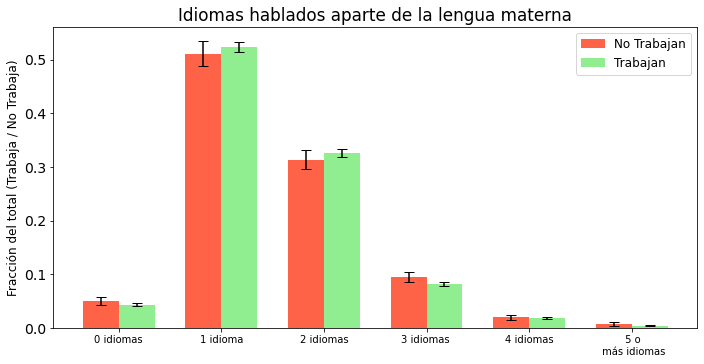

In [25]:
rama = 5

df_a =  df.iloc[np.where((df.IDIOMAS != ' ') & (df.IDIOMAS != 9) )].copy() # & (df.RAMA == rama)

plt.rcParams.update({'font.size': 14})

# + con, - sin, E erasmus, T trabajo

categs = [ '0 idiomas', '1 idioma', '2 idiomas', '3 idiomas ', 
          '4 idiomas',' 5 o\n más idiomas']

# No se fueron de erasmus
ps_h = [len(df_a.iloc[np.where((df_a.TRBPRN1 != 1) & (df_a.IDIOMAS == 1-1))].TRBPRN1)/len(df_a.iloc[np.where((df_a.TRBPRN1 != 1))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.TRBPRN1 != 1) & (df_a.IDIOMAS == 2-1))].TRBPRN1)/len(df_a.iloc[np.where((df_a.TRBPRN1 != 1))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.TRBPRN1 != 1) & (df_a.IDIOMAS == 3-1))].TRBPRN1)/len(df_a.iloc[np.where((df_a.TRBPRN1 != 1))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.TRBPRN1 != 1) & (df_a.IDIOMAS == 4-1))].TRBPRN1)/len(df_a.iloc[np.where((df_a.TRBPRN1 != 1))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.TRBPRN1 != 1) & (df_a.IDIOMAS == 5-1))].TRBPRN1)/len(df_a.iloc[np.where((df_a.TRBPRN1 != 1))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.TRBPRN1 != 1) & (df_a.IDIOMAS == 6-1))].TRBPRN1)/len(df_a.iloc[np.where((df_a.TRBPRN1 != 1))].EST_B2_5)]



err_ps_h = np.sqrt(np.array([len(df_a.iloc[np.where((df_a.TRBPRN1 != 1) & (df_a.IDIOMAS == 1-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.TRBPRN1 != 1) & (df_a.IDIOMAS == 2-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.TRBPRN1 != 1) & (df_a.IDIOMAS == 3-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.TRBPRN1 != 1) & (df_a.IDIOMAS == 4-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.TRBPRN1 != 1) & (df_a.IDIOMAS == 5-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.TRBPRN1 != 1) & (df_a.IDIOMAS == 6-1))].TRBPRN1)]))/np.array(
                            [len(df_a.iloc[np.where((df_a.TRBPRN1 != 1))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.TRBPRN1 != 1))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.TRBPRN1 != 1))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.TRBPRN1 != 1))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.TRBPRN1 != 1))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.TRBPRN1 != 1))].EST_B2_5)])



# Sí se fueron de erasmus
ps_m = [len(df_a.iloc[np.where((df_a.TRBPRN1 == 1) & (df_a.IDIOMAS == 1-1))].TRBPRN1)/len(df_a.iloc[np.where((df_a.TRBPRN1 == 1))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.TRBPRN1 == 1) & (df_a.IDIOMAS == 2-1))].TRBPRN1)/len(df_a.iloc[np.where((df_a.TRBPRN1 == 1))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.TRBPRN1 == 1) & (df_a.IDIOMAS == 3-1))].TRBPRN1)/len(df_a.iloc[np.where((df_a.TRBPRN1 == 1))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.TRBPRN1 == 1) & (df_a.IDIOMAS == 4-1))].TRBPRN1)/len(df_a.iloc[np.where((df_a.TRBPRN1 == 1))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.TRBPRN1 == 1) & (df_a.IDIOMAS == 5-1))].TRBPRN1)/len(df_a.iloc[np.where((df_a.TRBPRN1 == 1))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.TRBPRN1 == 1) & (df_a.IDIOMAS == 6-1))].TRBPRN1)/len(df_a.iloc[np.where((df_a.TRBPRN1 == 1))].EST_B2_5)]



err_ps_m = np.sqrt(np.array([len(df_a.iloc[np.where((df_a.TRBPRN1 == 1) & (df_a.IDIOMAS == 1-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.TRBPRN1 == 1) & (df_a.IDIOMAS == 2-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.TRBPRN1 == 1) & (df_a.IDIOMAS == 3-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.TRBPRN1 == 1) & (df_a.IDIOMAS == 4-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.TRBPRN1 == 1) & (df_a.IDIOMAS == 5-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.TRBPRN1 == 1) & (df_a.IDIOMAS == 6-1))].TRBPRN1)]))/np.array(
                            [len(df_a.iloc[np.where((df_a.TRBPRN1 == 1))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.TRBPRN1 == 1))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.TRBPRN1 == 1))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.TRBPRN1 == 1))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.TRBPRN1 == 1))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.TRBPRN1 == 1))].EST_B2_5)])



        
x = np.arange(len(categs))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[10,5])

rects1 = ax.bar(x - width/2, ps_h, width, label='No Trabajan', color = 'tomato', yerr = 2*err_ps_h, capsize = 5)
rects2 = ax.bar(x + width/2, ps_m, width, label='Trabajan', color = 'lightgreen', yerr = 2*err_ps_m, capsize = 5)

plt.xticks(x, categs, rotation = 0, fontsize = 10)


plt.ylabel('Fracción del total (Trabaja / No Trabaja)', fontsize = 12)
#plt.xlabel('Con o Sin Erasmus / Trabajo', fontsize = 14)


fig.tight_layout()

plt.legend(fontsize = 12, loc = 'upper right')
ramas = ['Ciencias Sociales y Jurídicas', 'Ingeniería y arquitectura','Ciencias de la Salud', 'Artes y Humanidades', 'Ciencias']
plt.title('Idiomas hablados aparte de la lengua materna')

In [17]:
df.EST_B2_5.value_counts()

     14637
2     9578
1     2853
9      122
Name: EST_B2_5, dtype: int64

### Erasmus e idiomas

Text(0.5, 1.0, 'Idiomas hablados aparte de la lengua materna')

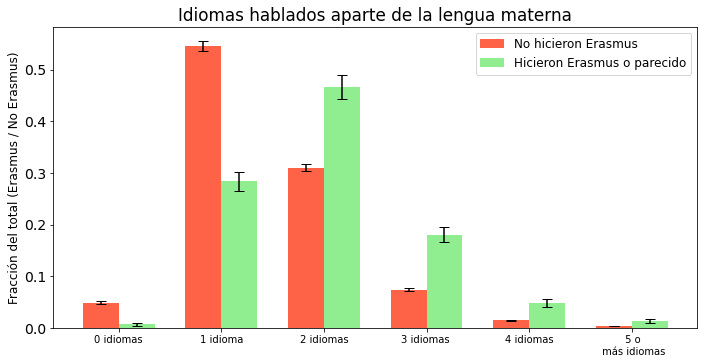

In [33]:
rama = 5

df_a =  df.iloc[np.where((df.IDIOMAS != ' ') & (df.IDIOMAS != 9) )].copy() # & (df.RAMA == rama)

plt.rcParams.update({'font.size': 14})

# + con, - sin, E erasmus, T trabajo

categs = [ '0 idiomas', '1 idioma', '2 idiomas', '3 idiomas ', 
          '4 idiomas',' 5 o\n más idiomas']

# No se fueron de erasmus
ps_h = [len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.IDIOMAS == 1-1))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.IDIOMAS == 2-1))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.IDIOMAS == 3-1))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.IDIOMAS == 4-1))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.IDIOMAS == 5-1))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.IDIOMAS == 6-1))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5)]



err_ps_h = np.sqrt(np.array([len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.IDIOMAS == 1-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.IDIOMAS == 2-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.IDIOMAS == 3-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.IDIOMAS == 4-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.IDIOMAS == 5-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.IDIOMAS == 6-1))].TRBPRN1)]))/np.array(
                            [len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5)])



# Sí se fueron de erasmus
ps_m = [len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.IDIOMAS == 1-1))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.IDIOMAS == 2-1))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.IDIOMAS == 3-1))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.IDIOMAS == 4-1))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.IDIOMAS == 5-1))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.IDIOMAS == 6-1))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5)]



err_ps_m = np.sqrt(np.array([len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.IDIOMAS == 1-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.IDIOMAS == 2-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.IDIOMAS == 3-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.IDIOMAS == 4-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.IDIOMAS == 5-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.IDIOMAS == 6-1))].TRBPRN1)]))/np.array(
                            [len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5)])



        
x = np.arange(len(categs))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[10,5])

rects1 = ax.bar(x - width/2, ps_h, width, label='No hicieron Erasmus', color = 'tomato', yerr = 2*err_ps_h, capsize = 5)
rects2 = ax.bar(x + width/2, ps_m, width, label='Hicieron Erasmus o parecido', color = 'lightgreen', yerr = 2*err_ps_m, capsize = 5)

plt.xticks(x, categs, rotation = 0, fontsize = 10)


plt.ylabel('Fracción del total (Erasmus / No Erasmus)', fontsize = 12)
#plt.xlabel('Con o Sin Erasmus / Trabajo', fontsize = 14)


fig.tight_layout()

plt.legend(fontsize = 12, loc = 'upper right')
ramas = ['Ciencias Sociales y Jurídicas', 'Ingeniería y arquitectura','Ciencias de la Salud', 'Artes y Humanidades', 'Ciencias']
plt.title('Idiomas hablados aparte de la lengua materna')

In [126]:
#NUM_TIT_IDI : Número de títulos de idiomas que puede acreditar

ids = []

for a in range(len(df.ACREIDI1)):
    b = 0
    if df.ACREIDI1.iloc[a] == '1':
        b += 1
    if df.ACREIDI2.iloc[a] == '1':
        b += 1
    if df.ACREIDI3.iloc[a] == '1':
        b += 1
    if df.ACREIDI4.iloc[a] == '1':
        b += 1
    
    ids.append(b)
    
df['NUM_TIT_IDI'] = ids

Text(0.5, 1.0, 'Idiomas conocidos / acreditados')

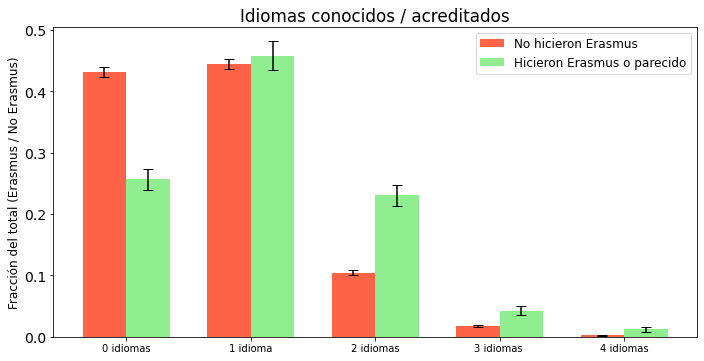

In [127]:
#df_a =  df.iloc[np.where((df.IDIOMAS != ' ') & (df.IDIOMAS != 9) )].copy() # & (df.RAMA == rama)

df_a = df.copy()

plt.rcParams.update({'font.size': 14})


categs = [ '0 idiomas', '1 idioma', '2 idiomas', '3 idiomas ', 
          '4 idiomas']

# No se fueron de erasmus
ps_h = [len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.NUM_TIT_IDI == 1-1))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.NUM_TIT_IDI == 2-1))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.NUM_TIT_IDI == 3-1))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.NUM_TIT_IDI == 4-1))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.NUM_TIT_IDI == 5-1))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5)]



err_ps_h = np.sqrt(np.array([len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.NUM_TIT_IDI == 1-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.NUM_TIT_IDI == 2-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.NUM_TIT_IDI == 3-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.NUM_TIT_IDI == 4-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 != '1') & (df_a.NUM_TIT_IDI == 5-1))].TRBPRN1)]))/np.array(
                            [len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].EST_B2_5)])



# Sí se fueron de erasmus
ps_m = [len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.NUM_TIT_IDI == 1-1))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.NUM_TIT_IDI == 2-1))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.NUM_TIT_IDI == 3-1))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.NUM_TIT_IDI == 4-1))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.NUM_TIT_IDI == 5-1))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5)]



err_ps_m = np.sqrt(np.array([len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.NUM_TIT_IDI == 1-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.NUM_TIT_IDI == 2-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.NUM_TIT_IDI == 3-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.NUM_TIT_IDI == 4-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.NUM_TIT_IDI == 5-1))].TRBPRN1)]))/np.array(
                            [len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5)])



        
x = np.arange(len(categs))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[10,5])

rects1 = ax.bar(x - width/2, ps_h, width, label='No hicieron Erasmus', color = 'tomato', yerr = 2*err_ps_h, capsize = 5)
rects2 = ax.bar(x + width/2, ps_m, width, label='Hicieron Erasmus o parecido', color = 'lightgreen', yerr = 2*err_ps_m, capsize = 5)

plt.xticks(x, categs, rotation = 0, fontsize = 10)


plt.ylabel('Fracción del total (Erasmus / No Erasmus)', fontsize = 12)
#plt.xlabel('Con o Sin Erasmus / Trabajo', fontsize = 14)


fig.tight_layout()

plt.legend(fontsize = 12, loc = 'upper right')

plt.title('Idiomas conocidos / acreditados')

In [76]:
df.IDIOMA1.iloc[np.where((df.IDI_MT2 == 'No Aplicable') | (df.IDI_MT2 == 'NS/NC'))].value_counts()

Inglés           17619
No Aplicable      1270
Español            942
Francés            792
Catalán            601
Valenciano         444
Euskera            393
NS/NC              302
Italiano           242
Gallego            130
Alemán             103
Portugués           96
Otros idiomas       28
Árabe               10
Ruso                 5
Rumano               3
Chino                1
Name: IDIOMA1, dtype: int64

In [75]:
df.IDI_MT2.value_counts()

No Aplicable     22981
Español           3291
Catalán           1692
Gallego           1268
Valenciano        1043
Euskera            634
Inglés             312
Otros idiomas      189
Francés            103
Alemán              36
Italiano            28
Portugués           27
Árabe               22
Ruso                15
Rumano               6
Chino                4
Name: IDI_MT2, dtype: int64

Text(0.5, 1.0, 'Idiomas acreditados aparte de la lengua materna')

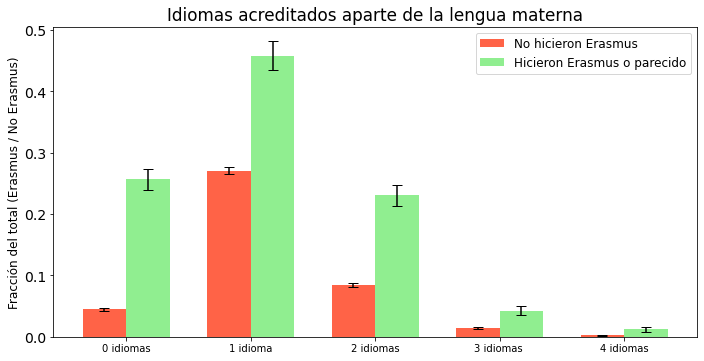

In [128]:
#Idiomas y acreditación


df_a =  df.iloc[np.where((df.IDIOMAS != ' ') & (df.IDIOMAS != 9) & (df.IDIOMAS != 6))].copy() # & (df.RAMA == rama)

df_a = df.copy()

plt.rcParams.update({'font.size': 14})


categs = [ '0 idiomas', '1 idioma', '2 idiomas', '3 idiomas ', 
          '4 idiomas']

# No se fueron de erasmus
ps_h = [len(df_a.iloc[np.where((df_a.IDIOMAS == 1-1) & (df_a.NUM_TIT_IDI == 1-1))].TRBPRN1)/len(df_a.EST_B2_5),
        len(df_a.iloc[np.where((df_a.IDIOMAS == 2-1) & (df_a.NUM_TIT_IDI == 2-1))].TRBPRN1)/len(df_a.EST_B2_5),
        len(df_a.iloc[np.where((df_a.IDIOMAS == 3-1) & (df_a.NUM_TIT_IDI == 3-1))].TRBPRN1)/len(df_a.EST_B2_5),
        len(df_a.iloc[np.where((df_a.IDIOMAS == 4-1) & (df_a.NUM_TIT_IDI == 4-1))].TRBPRN1)/len(df_a.EST_B2_5),
        len(df_a.iloc[np.where((df_a.IDIOMAS == 5-1) & (df_a.NUM_TIT_IDI == 5-1))].TRBPRN1)/len(df_a.EST_B2_5)]



err_ps_h = np.sqrt(np.array([len(df_a.iloc[np.where((df_a.IDIOMAS == 1-1) & (df_a.NUM_TIT_IDI == 1-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.IDIOMAS == 2-1) & (df_a.NUM_TIT_IDI == 2-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.IDIOMAS == 3-1) & (df_a.NUM_TIT_IDI == 3-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.IDIOMAS == 4-1) & (df_a.NUM_TIT_IDI == 4-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.IDIOMAS == 5-1) & (df_a.NUM_TIT_IDI == 5-1))].TRBPRN1)]))/np.array(
                            [len(df_a.EST_B2_5),
                             len(df_a.EST_B2_5),
                             len(df_a.EST_B2_5),
                             len(df_a.EST_B2_5),
                             len(df_a.EST_B2_5)])



# Sí se fueron de erasmus
ps_m = [len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.NUM_TIT_IDI == 1-1))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.NUM_TIT_IDI == 2-1))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.NUM_TIT_IDI == 3-1))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.NUM_TIT_IDI == 4-1))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
        len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.NUM_TIT_IDI == 5-1))].TRBPRN1)/len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5)]



err_ps_m = np.sqrt(np.array([len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.NUM_TIT_IDI == 1-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.NUM_TIT_IDI == 2-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.NUM_TIT_IDI == 3-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.NUM_TIT_IDI == 4-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1') & (df_a.NUM_TIT_IDI == 5-1))].TRBPRN1)]))/np.array(
                            [len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5),
                             len(df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].EST_B2_5)])



        
x = np.arange(len(categs))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=[10,5])

rects1 = ax.bar(x - width/2, ps_h, width, label='No hicieron Erasmus', color = 'tomato', yerr = 2*err_ps_h, capsize = 5)
rects2 = ax.bar(x + width/2, ps_m, width, label='Hicieron Erasmus o parecido', color = 'lightgreen', yerr = 2*err_ps_m, capsize = 5)

plt.xticks(x, categs, rotation = 0, fontsize = 10)


plt.ylabel('Fracción del total (Erasmus / No Erasmus)', fontsize = 12)
#plt.xlabel('Con o Sin Erasmus / Trabajo', fontsize = 14)


fig.tight_layout()

plt.legend(fontsize = 12, loc = 'upper right')

plt.title('Idiomas acreditados aparte de la lengua materna')

Text(0.5, 1.0, 'Idiomas conocidos / acreditados aparte de la lengua materna')

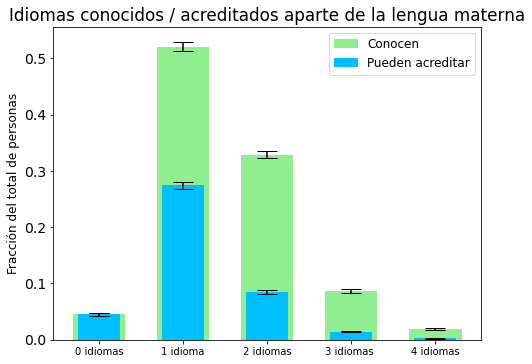

In [129]:
#Idiomas y acreditación


df_a =  df.iloc[np.where((df.IDIOMAS == 0) | (df.IDIOMAS == 1) | (df.IDIOMAS == 2) | (df.IDIOMAS == 3) | (df.IDIOMAS == 4))].copy() # & (df.RAMA == rama)


plt.rcParams.update({'font.size': 14})


categs = [ '0 idiomas', '1 idioma', '2 idiomas', '3 idiomas ', '4 idiomas']

# Hablan n idiomas y pueden acreditarlo
ps_h = [len(df_a.iloc[np.where((df_a.IDIOMAS == 1-1) & (df_a.NUM_TIT_IDI == 1-1))].TRBPRN1)/len(df_a.EST_B2_5),
        len(df_a.iloc[np.where((df_a.IDIOMAS == 2-1) & (df_a.NUM_TIT_IDI == 2-1))].TRBPRN1)/len(df_a.EST_B2_5),
        len(df_a.iloc[np.where((df_a.IDIOMAS == 3-1) & (df_a.NUM_TIT_IDI == 3-1))].TRBPRN1)/len(df_a.EST_B2_5),
        len(df_a.iloc[np.where((df_a.IDIOMAS == 4-1) & (df_a.NUM_TIT_IDI == 4-1))].TRBPRN1)/len(df_a.EST_B2_5),
        len(df_a.iloc[np.where((df_a.IDIOMAS == 5-1) & (df_a.NUM_TIT_IDI == 5-1))].TRBPRN1)/len(df_a.EST_B2_5)]



err_ps_h = np.sqrt(np.array([len(df_a.iloc[np.where((df_a.IDIOMAS == 1-1) & (df_a.NUM_TIT_IDI == 1-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.IDIOMAS == 2-1) & (df_a.NUM_TIT_IDI == 2-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.IDIOMAS == 3-1) & (df_a.NUM_TIT_IDI == 3-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.IDIOMAS == 4-1) & (df_a.NUM_TIT_IDI == 4-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.IDIOMAS == 5-1) & (df_a.NUM_TIT_IDI == 5-1))].TRBPRN1)]))/np.array(
                            [len(df_a.EST_B2_5),
                             len(df_a.EST_B2_5),
                             len(df_a.EST_B2_5),
                             len(df_a.EST_B2_5),
                             len(df_a.EST_B2_5)])

# Hablan n idiomas, y pueden o no acreditarlo
ps_m = [len(df_a.iloc[np.where((df_a.IDIOMAS == 1-1))].TRBPRN1)/len(df_a.EST_B2_5),
        len(df_a.iloc[np.where((df_a.IDIOMAS == 2-1))].TRBPRN1)/len(df_a.EST_B2_5),
        len(df_a.iloc[np.where((df_a.IDIOMAS == 3-1))].TRBPRN1)/len(df_a.EST_B2_5),
        len(df_a.iloc[np.where((df_a.IDIOMAS == 4-1))].TRBPRN1)/len(df_a.EST_B2_5),
        len(df_a.iloc[np.where((df_a.IDIOMAS == 5-1))].TRBPRN1)/len(df_a.EST_B2_5)]



err_ps_m = np.sqrt(np.array([len(df_a.iloc[np.where((df_a.IDIOMAS == 1-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.IDIOMAS == 2-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.IDIOMAS == 3-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.IDIOMAS == 4-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.IDIOMAS == 5-1))].TRBPRN1)]))/np.array(
                            [len(df_a.EST_B2_5),
                             len(df_a.EST_B2_5),
                             len(df_a.EST_B2_5),
                             len(df_a.EST_B2_5),
                             len(df_a.EST_B2_5)])


x = np.arange(len(categs))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=[7,5])

rects2 = ax.bar(x, ps_m, width*1.25, label='Conocen', color = 'lightgreen', yerr = 2*err_ps_m, capsize = 10)
rects1 = ax.bar(x, ps_h, width, label='Pueden acreditar', color = 'deepskyblue', yerr = 2*err_ps_h, capsize = 10)

plt.xticks(x, categs, rotation = 0, fontsize = 10)


plt.ylabel('Fracción del total de personas', fontsize = 12)
#plt.xlabel('Con o Sin Erasmus / Trabajo', fontsize = 14)


fig.tight_layout()

plt.legend(fontsize = 12, loc = 'upper right')

plt.title('Idiomas conocidos / acreditados aparte de la lengua materna')



In [104]:
len(df_a)

In [90]:
df_a.IDIOMAS.value_counts()

1    16257
2    10270
3     2693
0     1412
4      582
9      271
5      166
Name: IDIOMAS, dtype: int64

Text(0.5, 1.0, 'Idiomas conocidos / acreditados aparte de la lengua materna')

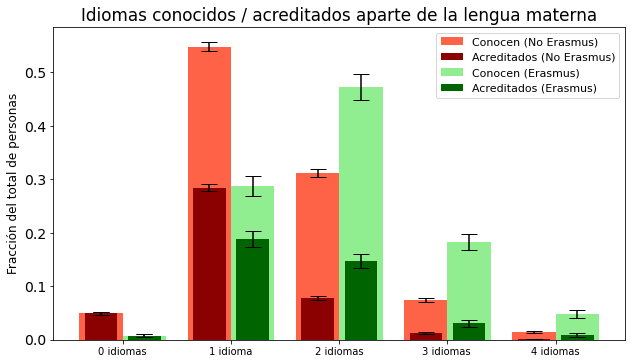

In [134]:
#Idiomas y acreditación


df_a =  df.iloc[np.where((df.IDIOMAS == 0) | (df.IDIOMAS == 1) | (df.IDIOMAS == 2) | (df.IDIOMAS == 3) | (df.IDIOMAS == 4))].copy() # & (df.RAMA == rama)


plt.rcParams.update({'font.size': 14})


categs = [ '0 idiomas', '1 idioma', '2 idiomas', '3 idiomas ', '4 idiomas']

# --------------- No Erasmus -------------------#

df_a = df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].copy()

# Hablan n idiomas y pueden acreditarlo
ps_h = [len(df_a.iloc[np.where((df_a.IDIOMAS == 1-1) & (df_a.NUM_TIT_IDI == 1-1))].TRBPRN1)/len(df_a.EST_B2_5),
        len(df_a.iloc[np.where((df_a.IDIOMAS == 2-1) & (df_a.NUM_TIT_IDI == 2-1))].TRBPRN1)/len(df_a.EST_B2_5),
        len(df_a.iloc[np.where((df_a.IDIOMAS == 3-1) & (df_a.NUM_TIT_IDI == 3-1))].TRBPRN1)/len(df_a.EST_B2_5),
        len(df_a.iloc[np.where((df_a.IDIOMAS == 4-1) & (df_a.NUM_TIT_IDI == 4-1))].TRBPRN1)/len(df_a.EST_B2_5),
        len(df_a.iloc[np.where((df_a.IDIOMAS == 5-1) & (df_a.NUM_TIT_IDI == 5-1))].TRBPRN1)/len(df_a.EST_B2_5)]



err_ps_h = np.sqrt(np.array([len(df_a.iloc[np.where((df_a.IDIOMAS == 1-1) & (df_a.NUM_TIT_IDI == 1-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.IDIOMAS == 2-1) & (df_a.NUM_TIT_IDI == 2-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.IDIOMAS == 3-1) & (df_a.NUM_TIT_IDI == 3-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.IDIOMAS == 4-1) & (df_a.NUM_TIT_IDI == 4-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.IDIOMAS == 5-1) & (df_a.NUM_TIT_IDI == 5-1))].TRBPRN1)]))/np.array(
                            [len(df_a.EST_B2_5),
                             len(df_a.EST_B2_5),
                             len(df_a.EST_B2_5),
                             len(df_a.EST_B2_5),
                             len(df_a.EST_B2_5)])

# Hablan n idiomas, y pueden o no acreditarlo
ps_m = [len(df_a.iloc[np.where((df_a.IDIOMAS == 1-1))].TRBPRN1)/len(df_a.EST_B2_5),
        len(df_a.iloc[np.where((df_a.IDIOMAS == 2-1))].TRBPRN1)/len(df_a.EST_B2_5),
        len(df_a.iloc[np.where((df_a.IDIOMAS == 3-1))].TRBPRN1)/len(df_a.EST_B2_5),
        len(df_a.iloc[np.where((df_a.IDIOMAS == 4-1))].TRBPRN1)/len(df_a.EST_B2_5),
        len(df_a.iloc[np.where((df_a.IDIOMAS == 5-1))].TRBPRN1)/len(df_a.EST_B2_5)]



err_ps_m = np.sqrt(np.array([len(df_a.iloc[np.where((df_a.IDIOMAS == 1-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.IDIOMAS == 2-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.IDIOMAS == 3-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.IDIOMAS == 4-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.IDIOMAS == 5-1))].TRBPRN1)]))/np.array(
                            [len(df_a.EST_B2_5),
                             len(df_a.EST_B2_5),
                             len(df_a.EST_B2_5),
                             len(df_a.EST_B2_5),
                             len(df_a.EST_B2_5)])



# --------------- Sí Erasmus -------------------#


df_a =  df.iloc[np.where((df.IDIOMAS == 0) | (df.IDIOMAS == 1) | (df.IDIOMAS == 2) | (df.IDIOMAS == 3) | (df.IDIOMAS == 4))].copy() # & (df.RAMA == rama)
df_a = df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].copy()


# Hablan n idiomas y pueden acreditarlo
ps_h_e = [len(df_a.iloc[np.where((df_a.IDIOMAS == 1-1) & (df_a.NUM_TIT_IDI == 1-1))].TRBPRN1)/len(df_a.EST_B2_5),
        len(df_a.iloc[np.where((df_a.IDIOMAS == 2-1) & (df_a.NUM_TIT_IDI == 2-1))].TRBPRN1)/len(df_a.EST_B2_5),
        len(df_a.iloc[np.where((df_a.IDIOMAS == 3-1) & (df_a.NUM_TIT_IDI == 3-1))].TRBPRN1)/len(df_a.EST_B2_5),
        len(df_a.iloc[np.where((df_a.IDIOMAS == 4-1) & (df_a.NUM_TIT_IDI == 4-1))].TRBPRN1)/len(df_a.EST_B2_5),
        len(df_a.iloc[np.where((df_a.IDIOMAS == 5-1) & (df_a.NUM_TIT_IDI == 5-1))].TRBPRN1)/len(df_a.EST_B2_5)]



err_ps_h_e = np.sqrt(np.array([len(df_a.iloc[np.where((df_a.IDIOMAS == 1-1) & (df_a.NUM_TIT_IDI == 1-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.IDIOMAS == 2-1) & (df_a.NUM_TIT_IDI == 2-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.IDIOMAS == 3-1) & (df_a.NUM_TIT_IDI == 3-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.IDIOMAS == 4-1) & (df_a.NUM_TIT_IDI == 4-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.IDIOMAS == 5-1) & (df_a.NUM_TIT_IDI == 5-1))].TRBPRN1)]))/np.array(
                            [len(df_a.EST_B2_5),
                             len(df_a.EST_B2_5),
                             len(df_a.EST_B2_5),
                             len(df_a.EST_B2_5),
                             len(df_a.EST_B2_5)])

# Hablan n idiomas, y pueden o no acreditarlo
ps_m_e = [len(df_a.iloc[np.where((df_a.IDIOMAS == 1-1))].TRBPRN1)/len(df_a.EST_B2_5),
        len(df_a.iloc[np.where((df_a.IDIOMAS == 2-1))].TRBPRN1)/len(df_a.EST_B2_5),
        len(df_a.iloc[np.where((df_a.IDIOMAS == 3-1))].TRBPRN1)/len(df_a.EST_B2_5),
        len(df_a.iloc[np.where((df_a.IDIOMAS == 4-1))].TRBPRN1)/len(df_a.EST_B2_5),
        len(df_a.iloc[np.where((df_a.IDIOMAS == 5-1))].TRBPRN1)/len(df_a.EST_B2_5)]



err_ps_m_e = np.sqrt(np.array([len(df_a.iloc[np.where((df_a.IDIOMAS == 1-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.IDIOMAS == 2-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.IDIOMAS == 3-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.IDIOMAS == 4-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.IDIOMAS == 5-1))].TRBPRN1)]))/np.array(
                            [len(df_a.EST_B2_5),
                             len(df_a.EST_B2_5),
                             len(df_a.EST_B2_5),
                             len(df_a.EST_B2_5),
                             len(df_a.EST_B2_5)])







# -----------------------------------------------#
x = np.arange(len(categs))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=[9,5])

rects2 = ax.bar(x - width/2, ps_m, width, label='Conocen (No Erasmus)', color = 'tomato', yerr = 2*err_ps_m, capsize = 8)
rects1 = ax.bar(x - width/2, ps_h, width*0.75, label='Acreditados (No Erasmus)', color = 'darkred', yerr = 2*err_ps_h, capsize = 8)
rects3 = ax.bar(x + width/2, ps_m_e, width, label='Conocen (Erasmus)', color = 'lightgreen', yerr = 2*err_ps_m_e, capsize = 8)
rects4 = ax.bar(x + width/2, ps_h_e, width*0.75, label='Acreditados (Erasmus)', color = 'darkgreen', yerr = 2*err_ps_h_e, capsize = 8)


plt.xticks(x, categs, rotation = 0, fontsize = 10)


plt.ylabel('Fracción del total de personas', fontsize = 12)
#plt.xlabel('Con o Sin Erasmus / Trabajo', fontsize = 14)


fig.tight_layout()

plt.legend(fontsize = 11, loc = 'upper right')

plt.title('Idiomas conocidos / acreditados aparte de la lengua materna')



Text(0.5, 1.0, 'Idiomas acreditados No Erasmus / Erasmus')

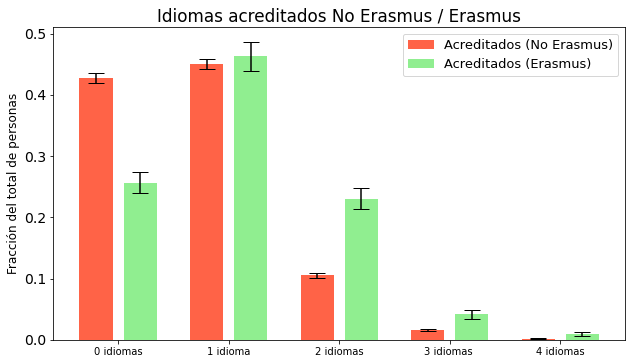

In [7]:
#Idiomas y acreditación


df_a =  df.iloc[np.where((df.IDIOMAS == 0) | (df.IDIOMAS == 1) | (df.IDIOMAS == 2) | (df.IDIOMAS == 3) | (df.IDIOMAS == 4))].copy() # & (df.RAMA == rama)


plt.rcParams.update({'font.size': 14})


categs = [ '0 idiomas', '1 idioma', '2 idiomas', '3 idiomas ', '4 idiomas']

# --------------- No Erasmus -------------------#

df_a = df_a.iloc[np.where((df_a.EST_B2_5 != '1'))].copy()

# Hablan n idiomas y pueden acreditarlo
ps_h = [len(df_a.iloc[np.where((df_a.NUM_TIT_IDI == 1-1))].TRBPRN1)/len(df_a.EST_B2_5),
        len(df_a.iloc[np.where((df_a.NUM_TIT_IDI == 2-1))].TRBPRN1)/len(df_a.EST_B2_5),
        len(df_a.iloc[np.where((df_a.NUM_TIT_IDI == 3-1))].TRBPRN1)/len(df_a.EST_B2_5),
        len(df_a.iloc[np.where((df_a.NUM_TIT_IDI == 4-1))].TRBPRN1)/len(df_a.EST_B2_5),
        len(df_a.iloc[np.where((df_a.NUM_TIT_IDI == 5-1))].TRBPRN1)/len(df_a.EST_B2_5)]



err_ps_h = np.sqrt(np.array([len(df_a.iloc[np.where((df_a.NUM_TIT_IDI == 1-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.NUM_TIT_IDI == 2-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.NUM_TIT_IDI == 3-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.NUM_TIT_IDI == 4-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.NUM_TIT_IDI == 5-1))].TRBPRN1)]))/np.array(
                            [len(df_a.EST_B2_5),
                             len(df_a.EST_B2_5),
                             len(df_a.EST_B2_5),
                             len(df_a.EST_B2_5),
                             len(df_a.EST_B2_5)])





# --------------- Sí Erasmus -------------------#


df_a =  df.iloc[np.where((df.IDIOMAS == 0) | (df.IDIOMAS == 1) | (df.IDIOMAS == 2) | (df.IDIOMAS == 3) | (df.IDIOMAS == 4))].copy() # & (df.RAMA == rama)
df_a = df_a.iloc[np.where((df_a.EST_B2_5 == '1'))].copy()


# Hablan n idiomas y pueden acreditarlo
ps_h_e = [len(df_a.iloc[np.where((df_a.NUM_TIT_IDI == 1-1))].TRBPRN1)/len(df_a.EST_B2_5),
        len(df_a.iloc[np.where((df_a.NUM_TIT_IDI == 2-1))].TRBPRN1)/len(df_a.EST_B2_5),
        len(df_a.iloc[np.where((df_a.NUM_TIT_IDI == 3-1))].TRBPRN1)/len(df_a.EST_B2_5),
        len(df_a.iloc[np.where((df_a.NUM_TIT_IDI == 4-1))].TRBPRN1)/len(df_a.EST_B2_5),
        len(df_a.iloc[np.where((df_a.NUM_TIT_IDI == 5-1))].TRBPRN1)/len(df_a.EST_B2_5)]



err_ps_h_e = np.sqrt(np.array([len(df_a.iloc[np.where((df_a.NUM_TIT_IDI == 1-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.NUM_TIT_IDI == 2-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.NUM_TIT_IDI == 3-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.NUM_TIT_IDI == 4-1))].TRBPRN1),
                             len(df_a.iloc[np.where((df_a.NUM_TIT_IDI == 5-1))].TRBPRN1)]))/np.array(
                            [len(df_a.EST_B2_5),
                             len(df_a.EST_B2_5),
                             len(df_a.EST_B2_5),
                             len(df_a.EST_B2_5),
                             len(df_a.EST_B2_5)])






# -----------------------------------------------#
x = np.arange(len(categs))  # the label locations
width = 0.4  # the width of the bars

fig, ax = plt.subplots(figsize=[9,5])

#rects2 = ax.bar(x - width/2, ps_m, width, label='Conocen (No Erasmus)', color = 'tomato', yerr = 2*err_ps_m, capsize = 8)
rects1 = ax.bar(x - width/2, ps_h, width*0.75, label='Acreditados (No Erasmus)', color = 'tomato', yerr = 2*err_ps_h, capsize = 8)
#rects3 = ax.bar(x + width/2, ps_m_e, width, label='Conocen (Erasmus)', color = 'lightgreen', yerr = 2*err_ps_m_e, capsize = 8)
rects4 = ax.bar(x + width/2, ps_h_e, width*0.75, label='Acreditados (Erasmus)', color = 'lightgreen', yerr = 2*err_ps_h_e, capsize = 8)


plt.xticks(x, categs, rotation = 0, fontsize = 10)


plt.ylabel('Fracción del total de personas', fontsize = 12)
#plt.xlabel('Con o Sin Erasmus / Trabajo', fontsize = 14)


fig.tight_layout()

plt.legend(fontsize = 13, loc = 'upper right')

plt.title('Idiomas acreditados No Erasmus / Erasmus')



## Features en 2D

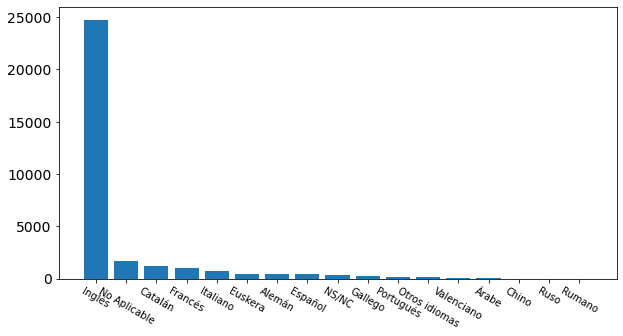

In [253]:
plt.figure(figsize = [10,5])
plt.bar(df.IDIOMA1.unique(),df.IDIOMA1.value_counts())
t = plt.xticks(fontsize = 10, rotation = -30)

<Figure size 432x288 with 0 Axes>

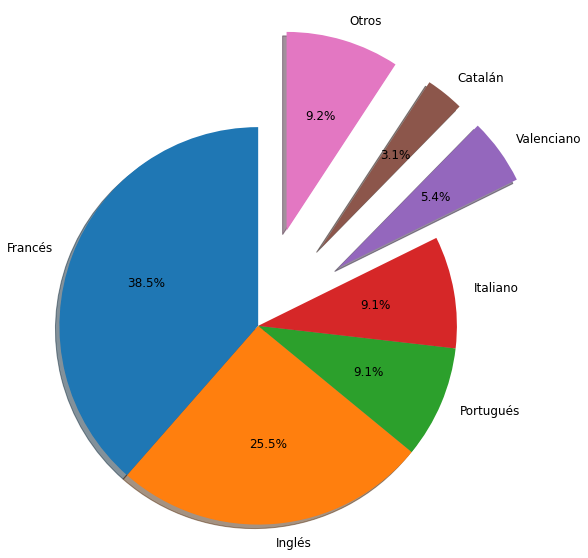

In [5]:
limi = 6 #limite de valores que representamos
explo = 3 #cuantos queremos sacar del círculo (0 a n-1)
feat = 'IDIOMA2'

plt.rcParams.update({'font.size': 12})
plt.figure()

df_a = df.iloc[np.where(df[feat] != 'No Aplicable')].copy()

vals = np.append(np.array(df_a[feat].value_counts().iloc[:limi]),np.sum(np.array(df_a[feat].value_counts().iloc[limi:])))
labs = np.append(df_a[feat].unique()[:limi],'Otros')

num_v = len(labs)

fig1, ax1 = plt.subplots(figsize = [10,10])
ax1.pie(vals, labels= labs, autopct='%1.1f%%',
        shadow=True, startangle=90, explode = [0 for i in range(num_v - explo)] + [0.5 for i in range(explo)])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

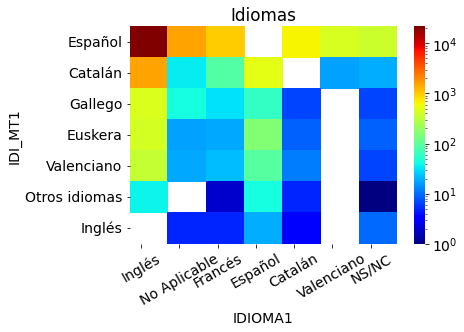

In [8]:
df_a = df.copy()  #.iloc[np.where(df[feat] != 'No Aplicable')].copy()

limi = 7
limi2 = 7
feat1 = 'IDI_MT1'
feat2 = 'IDIOMA1'#'IDIOMA1'


a1 = df_a[feat1].value_counts().index[:limi]
b1 = df_a[feat1].value_counts()[:limi]

a2 = df_a[feat2].value_counts().index[:limi2]
b2 = df_a[feat2].value_counts()[:limi2]

hem = np.zeros([limi,limi2])

for i,f1 in zip(range(limi),a1):
    for j,f2 in zip(range(limi2),a2):
        #print(f1,f2)
        hem[i,j] = len(df_a.iloc[np.where((df_a[feat1] == f1)&(df_a[feat2] == f2))])
        #print(f1,f2,hem[i,j])


plt.figure()
ax = sns.heatmap((hem),cmap=plt.cm.jet, norm = LogNorm())
plt.title('Idiomas')
plt.xticks(np.array(range(limi2))+0.3,a2, rotation = 30)
plt.yticks(np.array(range(limi))+0.5,(np.array(a1)), rotation = 0)
plt.xlabel(feat2, fontsize = 14)
plt.ylabel(feat1, fontsize = 14)
plt.show()


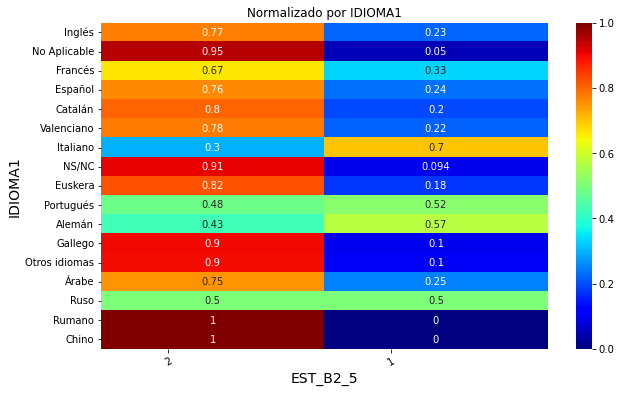

In [6]:
df_a = df.iloc[np.where((df['EST_B2_5'] != ' ') & (df['EST_B2_5'] != '9') )].copy() #& (df['ACREIDI2'] == '1')

limi = 99
limi2 = 5
feat1 = 'IDIOMA1'
feat2 = 'EST_B2_5'#'IDIOMA1', 'IDI_MT1'
normalize = 1 # Normalize over 1: feature 1 (normalized rows), 2: feature 2, False: No normalization

if len(df_a[feat1].value_counts()) < limi:
    limi = len(df_a[feat1].value_counts())
    
if len(df_a[feat2].value_counts()) < limi2:
    limi2 = len(df_a[feat2].value_counts())

  
    
a1 = df_a[feat1].value_counts().index[:limi]
b1 = df_a[feat1].value_counts()[:limi]

a2 = df_a[feat2].value_counts().index[:limi2]
b2 = df_a[feat2].value_counts()[:limi2]

hem = np.zeros([limi,limi2])

for i,f1 in zip(range(limi),a1):
    for j,f2 in zip(range(limi2),a2):
        #print(f1,f2)
        hem[i,j] = len(df_a.iloc[np.where((df_a[feat1] == f1)&(df_a[feat2] == f2))])
        #print(f1,f2,hem[i,j])

if normalize == 1:
    n_por = feat1
    for i in range(limi):
        norm = np.sum(hem[i,:])
        for j in range(limi2):
            hem[i,j] = hem[i,j]/norm      
elif normalize == 2:
    n_por = feat2
    for i in range(limi2):
        norm = np.sum(hem[:,i])
        for j in range(limi):
            hem[j,i] = hem[j,i]/norm
elif normalize == False:
    n_por = 'Ninguno'

        
        
plt.figure(figsize = [10,6])
ax = sns.heatmap((hem),cmap=plt.cm.jet, annot = True) #, norm = LogNorm()
plt.title('Normalizado por {}'.format(n_por))
plt.xticks(np.array(range(limi2))+0.3,a2, rotation = 30)
plt.yticks(np.array(range(limi))+0.5,(np.array(a1)), rotation = 0)
plt.xlabel(feat2, fontsize = 14)
plt.ylabel(feat1, fontsize = 14)
plt.show()
#hem

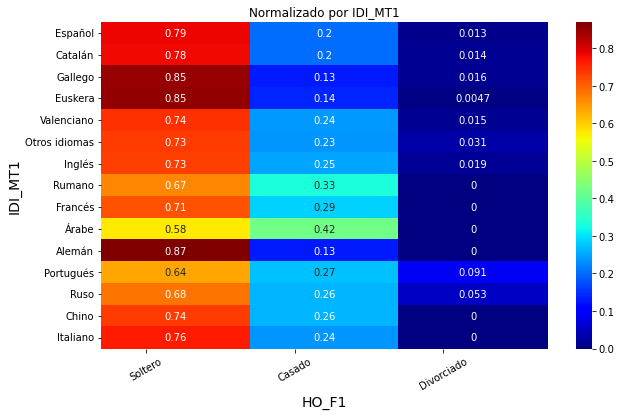

In [12]:
df_a = df.copy() #.iloc[np.where((df['EST_B2_5'] != ' ') & (df['EST_B2_5'] != '9') )].copy() #& (df['ACREIDI2'] == '1')

limi = 99
limi2 = 3
feat1 = 'IDI_MT1'
feat2 = 'HO_F1'#'IDIOMA1', 'IDI_MT1'
normalize = 1 # Normalize over 1: feature 1 (normalized rows), 2: feature 2, False: No normalization

if len(df_a[feat1].value_counts()) < limi:
    limi = len(df_a[feat1].value_counts())
    
if len(df_a[feat2].value_counts()) < limi2:
    limi2 = len(df_a[feat2].value_counts())

  
    
a1 = df_a[feat1].value_counts().index[:limi]
b1 = df_a[feat1].value_counts()[:limi]

a2 = df_a[feat2].value_counts().index[:limi2]
b2 = df_a[feat2].value_counts()[:limi2]

hem = np.zeros([limi,limi2])

for i,f1 in zip(range(limi),a1):
    for j,f2 in zip(range(limi2),a2):
        #print(f1,f2)
        hem[i,j] = len(df_a.iloc[np.where((df_a[feat1] == f1)&(df_a[feat2] == f2))])
        #print(f1,f2,hem[i,j])

if normalize == 1:
    n_por = feat1
    for i in range(limi):
        norm = np.sum(hem[i,:])
        for j in range(limi2):
            hem[i,j] = hem[i,j]/norm      
elif normalize == 2:
    n_por = feat2
    for i in range(limi2):
        norm = np.sum(hem[:,i])
        for j in range(limi):
            hem[j,i] = hem[j,i]/norm
elif normalize == False:
    n_por = 'Ninguno'

a2 = ['Soltero','Casado','Divorciado']
        
plt.figure(figsize = [10,6])
ax = sns.heatmap((hem),cmap=plt.cm.jet, annot = True) #, norm = LogNorm()
plt.title('Normalizado por {}'.format(n_por))
plt.xticks(np.array(range(limi2))+0.3,a2, rotation = 30)
plt.yticks(np.array(range(limi))+0.5,(np.array(a1)), rotation = 0)
plt.xlabel(feat2, fontsize = 14)
plt.ylabel(feat1, fontsize = 14)
plt.show()
#hem

In [35]:
np.sum(hem[5,:])

In [45]:
hem[:,0]

array([0.87141842, 0.83473787, 0.85795455, 0.88028169])

<BarContainer object of 7 artists>

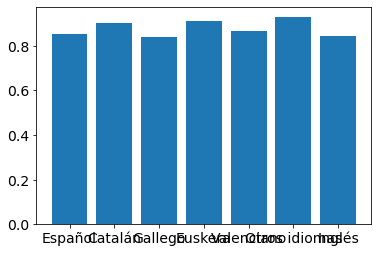

In [37]:
plt.bar(a1,hem[:,0])